# Imports

In [133]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import sys
# sys.path.append('../ClusterPlot')
sys.path.append('../utils')

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

from DataSetFactory import DataSetFactory
from ClusterPlot_understand import ClusterPlot

In [134]:
RANDOM_STATE = 42
ds = DataSetFactory.get_dataset('hourglass2', random_state=RANDOM_STATE, sample=None, is_subset=False)
ds.df
ds.label_col

,X,Y,Z,Poly
0,2.664885,0.849356,-0.046342,0
1,1.608484,2.099026,-0.046573,0
2,1.863890,1.164917,-0.101283,0
3,1.584289,1.465447,0.031425,0
4,2.368466,1.760610,-0.029169,0
...,...,...,...,...
15,6.083836,1.820734,-0.010797,1
16,5.546064,1.809470,-0.000681,1
17,6.000483,2.076545,0.003640,1
18,5.579746,2.341622,0.006056,1


'Poly'

# 3D Plot

[]

[]

[]

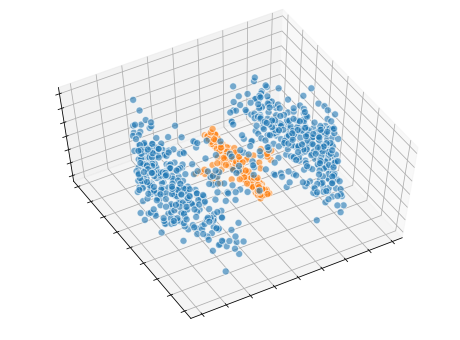

In [135]:
# %matplotlib notebook

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = ds.df[ds.df[ds.label_col] == 0]['X']
ys = ds.df[ds.df[ds.label_col] == 0]['Y']
zs = ds.df[ds.df[ds.label_col] == 0]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

xs = ds.df[ds.df[ds.label_col] == 1]['X']
ys = ds.df[ds.df[ds.label_col] == 1]['Y']
zs = ds.df[ds.df[ds.label_col] == 1]['Z']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

# remove ticks
ax = plt.gca()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)

ax.view_init(elev=60, azim=60)

# plt.show()

In [136]:
X = ds.df[ds.feature_cols].values
y = ds.df[ds.label_col].values
X.shape, y.shape
ds.class_to_label

((940, 3), (940,))

{0: 'Poly0', 1: 'Poly1'}

# Cluster Plots

In [137]:
%matplotlib inline
blobs_cp = ClusterPlot(reduce_all_points=False,
                  n_iter=1, 
                  batch_size=0,
                  learning_rate=0.1,
                  dataset='Hourglass2',
                  class_to_label=ds.class_to_label,
                  show_fig=True,
                  save_fig=False,
                  random_state=RANDOM_STATE,
                  show_inner_blobs=True,
                  show_blobs=True,
                  show_label_level_plots=False,
                  show_anchor_level_plot=False,
                  birch_threshold=0.42,
                  alpha=0.8,
                  douglas_peucker_tolerance= 0,
                  smooth_iter=3,
                  magnitude_step=False,
                  show_loss_plot=False,
                  show_anchors=True,
                  show_anchors_annotation=False,
                  show_points=True,
                  uniform_points_per='label',
                  point_margin = 0.001,
                      )

2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,041 - ClusterPlot-18645 - INFO - finding intra class anchors using birch
2021-10-21 11:15:45,269 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
2021-10-21 11:15:45,269 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
2021-10-21 11:15:45,269 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
2021-10-21 11:15:45,269 - ClusterPlot-18645 - INFO - UnSupervised Dim Reduction
2021-10-21 11:15:45,269 - Clu

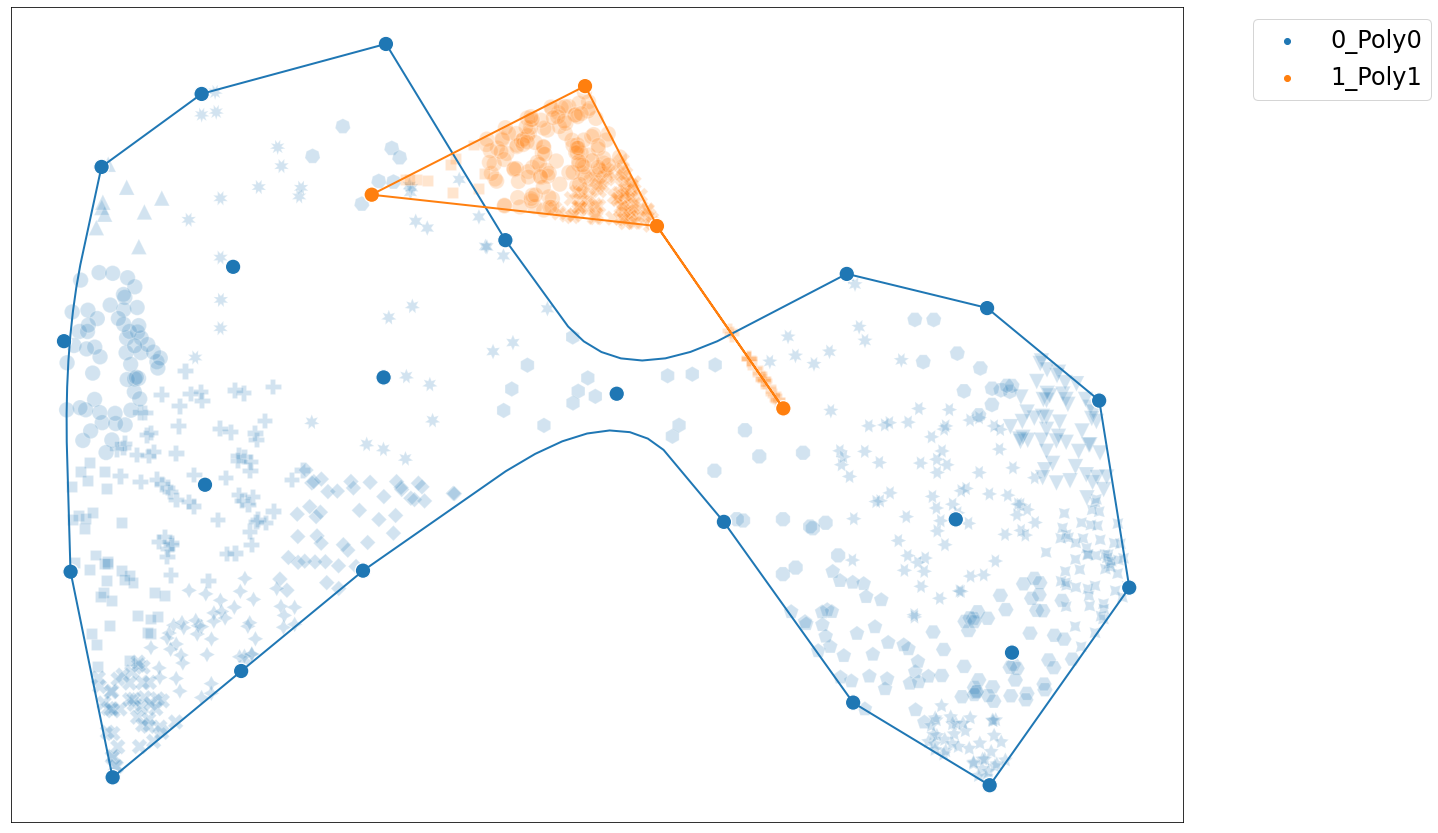

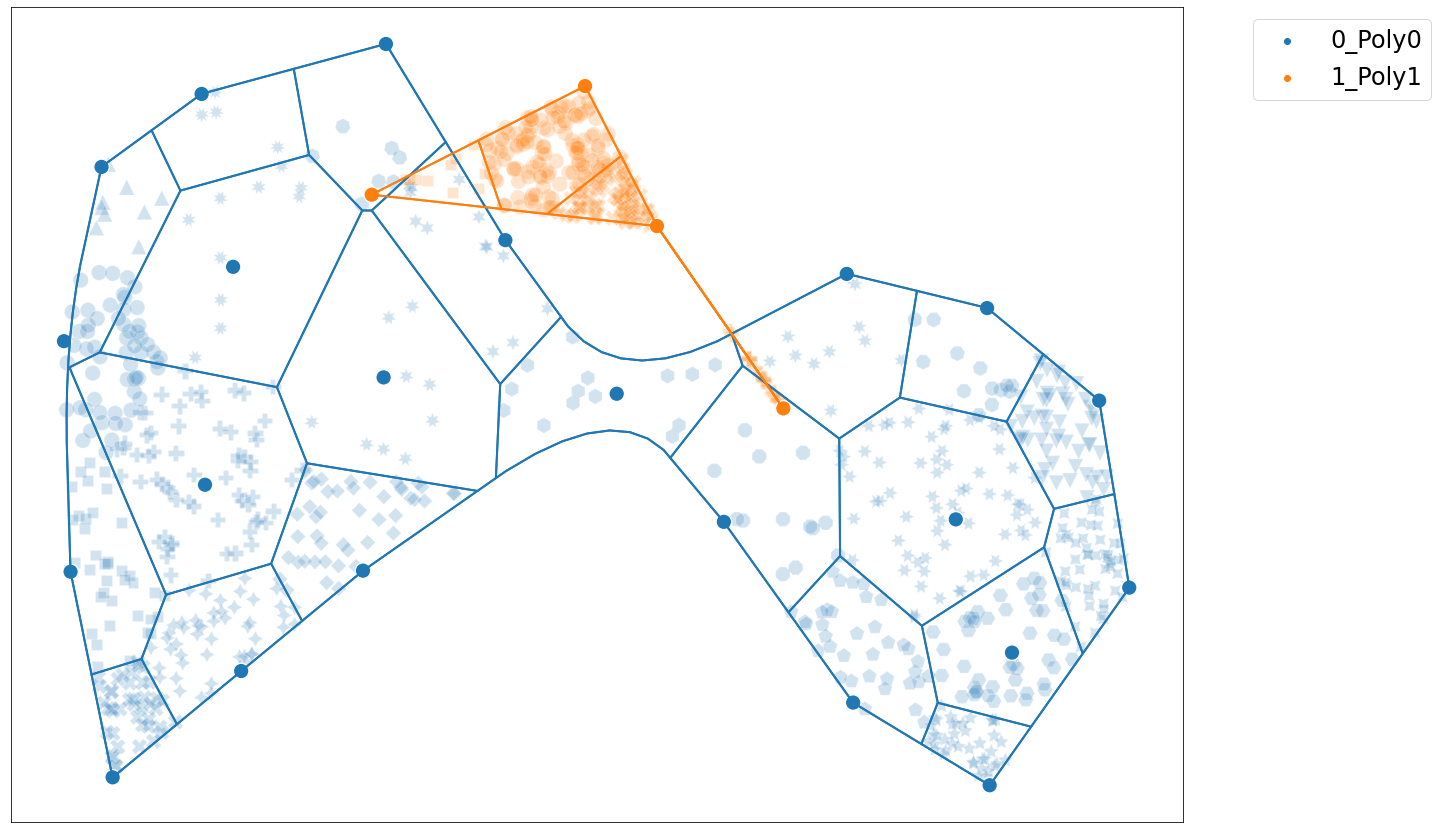

In [138]:
low_dim_blobs_cp = blobs_cp.fit_transform(X, y)

In [142]:
blobs_cp.voronoiPoints

array([[-6.094667 ,  8.8258   ],
       [-5.501627 ,  7.8903775],
       [-7.8536444,  8.10002  ],
       [-4.459698 ,  6.6718297]], dtype=float32)

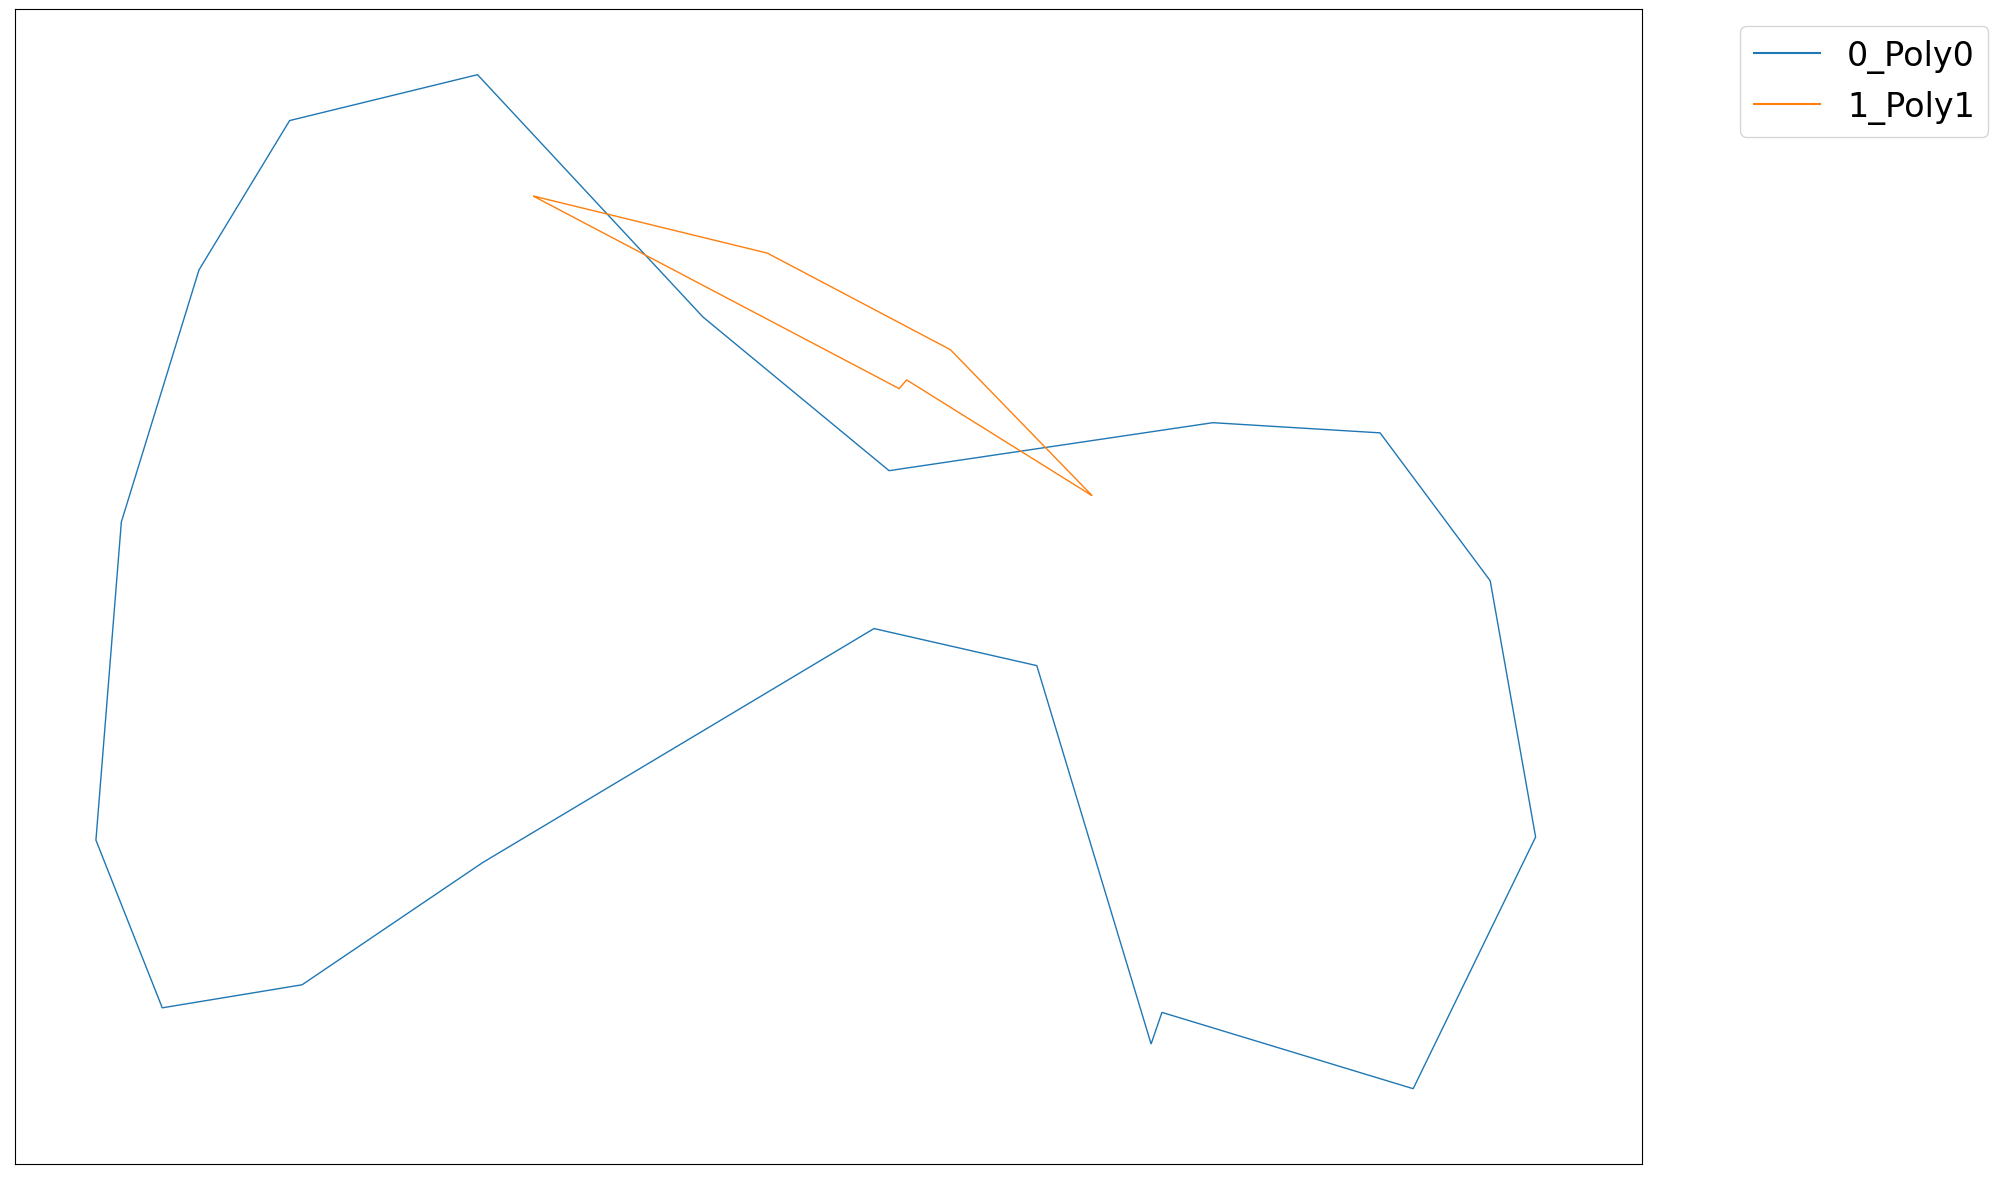

In [19]:
tmpContour = blobs_cp._get_contour_df()   
#get_contour_df() 返回的是给每个点加了4个margin的countour 包围圈的点数 为(130,3) anchor点为(26,3)
# tmpAnchors = blobs_cp.low_dim_anchors #(26,3)
tmpContour

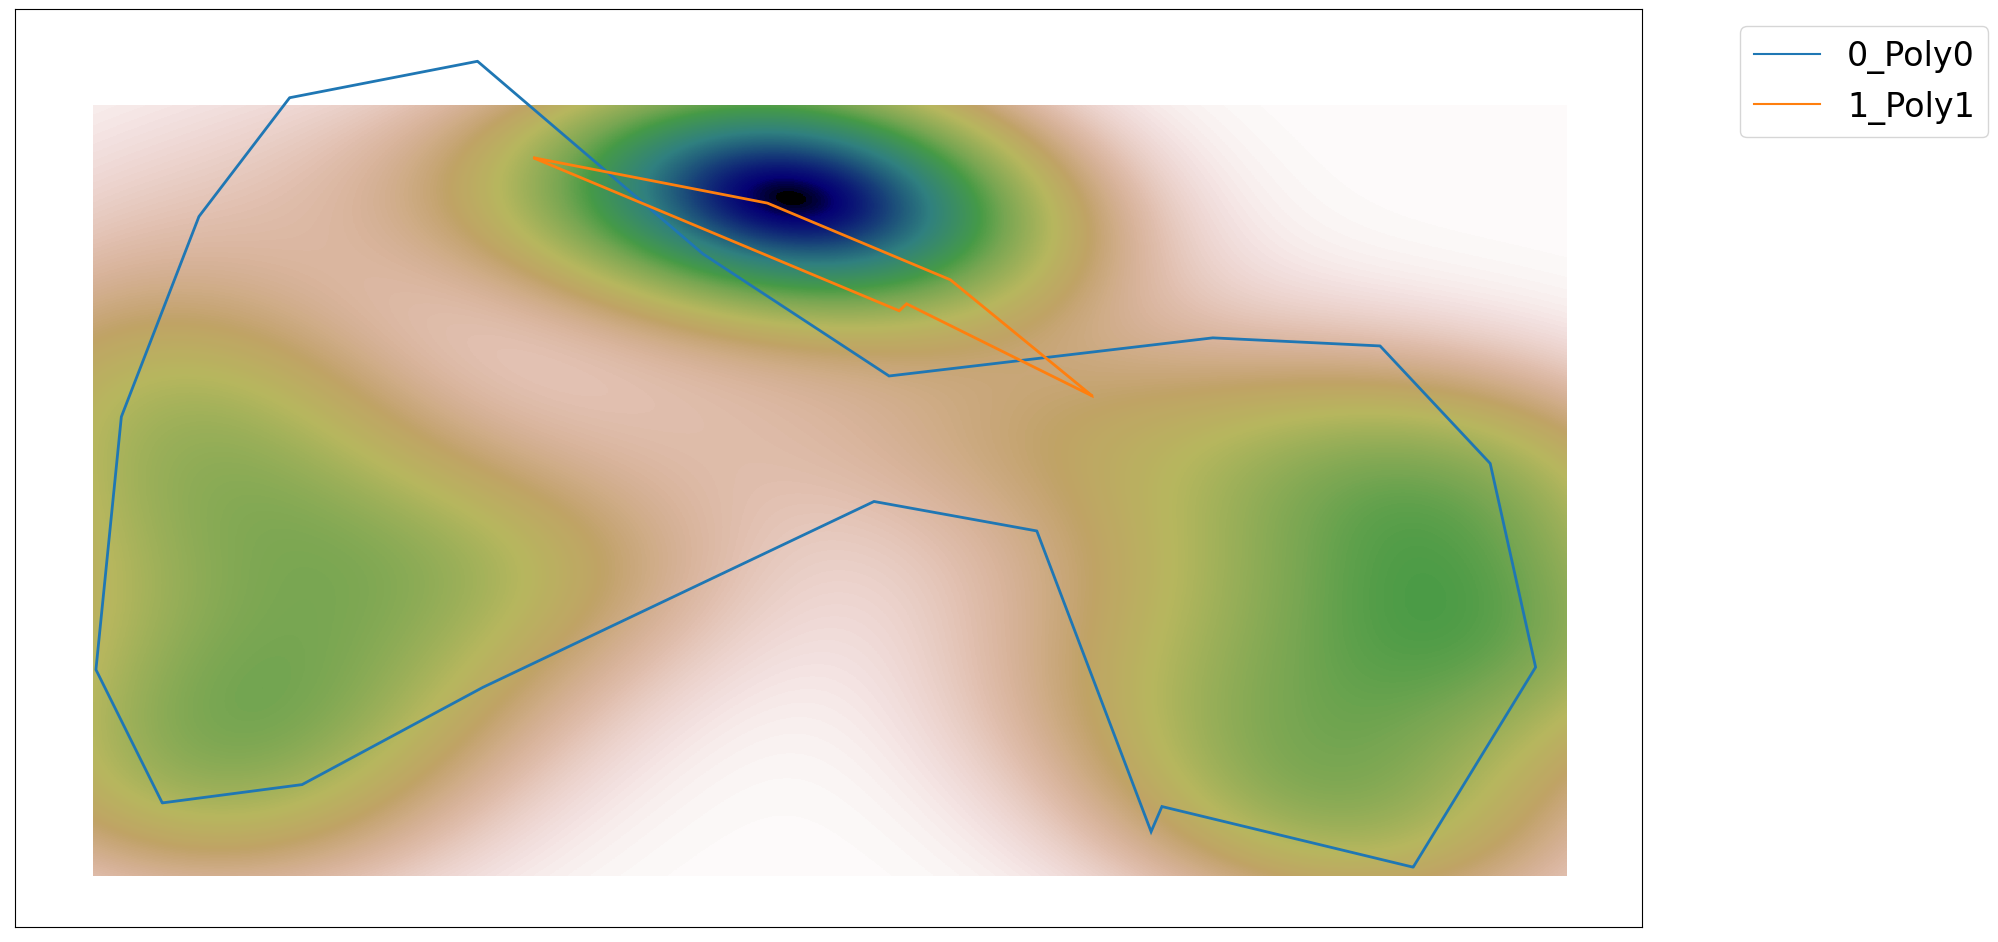

In [22]:
blobs_cp._pebble_voronio_plot(alpha=1)
blobs_cp.alpha

blobs_cp._cluster_plot_set_sns(2,show_points=True)

In [30]:
**3、  self.anchors_indices = [i for i in range(len(self.y_with_centroids) - len(self.intra_class_anchors_labels),
                                                 len(self.y_with_centroids))]**

((19316,), (19316,))

In [31]:
blobs_cp.y_with_centroids.shape

(966,)

In [32]:
blobs_cp.clusters

array([ 0,  1,  2,  2,  3,  1,  1,  0,  1,  0,  3,  3,  2,  1,  0,  0,  3,
        1,  4,  5,  3,  1,  0,  5,  2,  6,  4,  2,  2,  5,  0,  3,  3,  3,
        3,  4,  0,  4,  2,  1,  4,  1,  5,  4,  2,  4,  0,  1,  0,  0,  5,
        0,  0,  4,  2,  5,  3,  1,  3,  4,  4,  3,  3,  5,  4,  4,  3,  3,
        0,  3,  5,  2,  4,  3,  0,  4,  4,  6,  2,  0,  3,  5,  3,  0,  2,
        0,  5,  2,  3,  5,  4,  1,  1,  1,  2,  5,  1,  5,  2,  3,  1,  4,
        3,  0,  2,  1,  3,  0,  3,  2,  2,  1,  2,  3,  4,  0,  3,  3,  0,
        5,  4,  2,  2,  1,  0,  5,  5,  3,  1,  2,  0,  3,  0,  0,  0,  2,
        0,  4,  0,  1,  5,  2,  2,  2,  3,  1,  1,  4,  1,  1,  3,  1,  4,
       17,  5,  5,  3,  3,  0,  0,  0,  5,  4,  5,  0,  5,  5,  5,  3,  0,
        4,  3,  0,  0,  6,  5,  0,  3,  0,  4,  5,  3,  1,  1,  2,  1,  1,
        0,  4,  5,  5,  0,  0,  3,  5,  4,  3,  6,  3,  3,  0,  5,  1,  0,
        0,  3,  4,  1,  1,  5,  6,  0,  4,  5,  3,  5,  6,  3,  5,  3,  4,
        3,  2,  2,  3,  2

In [33]:
for x1, x2 in zip(edges_x1, edges_x2):
    anchor_x1 = blobs_cp._sample_index_to_anchor(blobs_cp.y_with_centroids[x1], blobs_cp.clusters[x1])
    anchor_x2 = blobs_cp._sample_index_to_anchor(blobs_cp.y_with_centroids[x2], blobs_cp.clusters[x2])
    print(x1, x2)
    print(f"anchor1_x1:{anchor_x1}, anchor_x2:{anchor_x2}")
    blobs_cp.inter_class_relations[anchor_x1][anchor_x2] += 1
    blobs_cp.inter_class_relations_label_level[blobs_cp.y_with_centroids[x1]][blobs_cp.y_with_centroids[x2]] += 1

0 284
anchor1_x1:0, anchor_x2:0
0 289
anchor1_x1:0, anchor_x2:0
0 191
anchor1_x1:0, anchor_x2:0
0 160
anchor1_x1:0, anchor_x2:0
0 940
anchor1_x1:0, anchor_x2:0
0 187
anchor1_x1:0, anchor_x2:0
0 49
anchor1_x1:0, anchor_x2:0
0 15
anchor1_x1:0, anchor_x2:0
0 79
anchor1_x1:0, anchor_x2:0
0 176
anchor1_x1:0, anchor_x2:0
0 103
anchor1_x1:0, anchor_x2:0
0 200
anchor1_x1:0, anchor_x2:0
0 9
anchor1_x1:0, anchor_x2:0
0 276
anchor1_x1:0, anchor_x2:0
0 246
anchor1_x1:0, anchor_x2:0
0 107
anchor1_x1:0, anchor_x2:0
0 278
anchor1_x1:0, anchor_x2:0
0 51
anchor1_x1:0, anchor_x2:0
0 115
anchor1_x1:0, anchor_x2:0
0 235
anchor1_x1:0, anchor_x2:0
1 186
anchor1_x1:1, anchor_x2:1
1 13
anchor1_x1:1, anchor_x2:1
1 6
anchor1_x1:1, anchor_x2:1
1 207
anchor1_x1:1, anchor_x2:1
1 256
anchor1_x1:1, anchor_x2:1
1 941
anchor1_x1:1, anchor_x2:1
1 8
anchor1_x1:1, anchor_x2:1
1 139
anchor1_x1:1, anchor_x2:1
1 111
anchor1_x1:1, anchor_x2:1
1 148
anchor1_x1:1, anchor_x2:1
1 286
anchor1_x1:1, anchor_x2:1
1 105
anchor1_x1:1,

17 98
anchor1_x1:1, anchor_x2:2
17 3
anchor1_x1:1, anchor_x2:2
17 261
anchor1_x1:1, anchor_x2:2
17 93
anchor1_x1:1, anchor_x2:1
17 238
anchor1_x1:1, anchor_x2:2
17 21
anchor1_x1:1, anchor_x2:1
17 142
anchor1_x1:1, anchor_x2:2
17 254
anchor1_x1:1, anchor_x2:1
17 223
anchor1_x1:1, anchor_x2:2
17 182
anchor1_x1:1, anchor_x2:1
17 225
anchor1_x1:1, anchor_x2:2
17 294
anchor1_x1:1, anchor_x2:2
18 179
anchor1_x1:4, anchor_x2:4
18 26
anchor1_x1:4, anchor_x2:4
18 162
anchor1_x1:4, anchor_x2:4
18 43
anchor1_x1:4, anchor_x2:4
18 252
anchor1_x1:4, anchor_x2:4
18 59
anchor1_x1:4, anchor_x2:4
18 90
anchor1_x1:4, anchor_x2:4
18 212
anchor1_x1:4, anchor_x2:4
18 944
anchor1_x1:4, anchor_x2:4
18 75
anchor1_x1:4, anchor_x2:4
18 64
anchor1_x1:4, anchor_x2:4
18 37
anchor1_x1:4, anchor_x2:4
18 76
anchor1_x1:4, anchor_x2:4
18 206
anchor1_x1:4, anchor_x2:4
18 137
anchor1_x1:4, anchor_x2:4
18 101
anchor1_x1:4, anchor_x2:4
18 188
anchor1_x1:4, anchor_x2:4
18 114
anchor1_x1:4, anchor_x2:4
18 120
anchor1_x1:4, an

32 82
anchor1_x1:3, anchor_x2:3
32 205
anchor1_x1:3, anchor_x2:3
32 192
anchor1_x1:3, anchor_x2:0
32 46
anchor1_x1:3, anchor_x2:0
32 219
anchor1_x1:3, anchor_x2:3
32 156
anchor1_x1:3, anchor_x2:3
32 131
anchor1_x1:3, anchor_x2:3
32 169
anchor1_x1:3, anchor_x2:0
33 279
anchor1_x1:3, anchor_x2:3
33 80
anchor1_x1:3, anchor_x2:3
33 233
anchor1_x1:3, anchor_x2:3
33 241
anchor1_x1:3, anchor_x2:3
33 274
anchor1_x1:3, anchor_x2:3
33 165
anchor1_x1:3, anchor_x2:5
33 61
anchor1_x1:3, anchor_x2:3
33 180
anchor1_x1:3, anchor_x2:5
33 243
anchor1_x1:3, anchor_x2:4
33 214
anchor1_x1:3, anchor_x2:3
33 198
anchor1_x1:3, anchor_x2:3
33 117
anchor1_x1:3, anchor_x2:3
33 40
anchor1_x1:3, anchor_x2:4
33 56
anchor1_x1:3, anchor_x2:3
33 102
anchor1_x1:3, anchor_x2:3
33 67
anchor1_x1:3, anchor_x2:3
33 66
anchor1_x1:3, anchor_x2:3
33 16
anchor1_x1:3, anchor_x2:3
33 298
anchor1_x1:3, anchor_x2:4
33 248
anchor1_x1:3, anchor_x2:4
34 285
anchor1_x1:3, anchor_x2:3
34 143
anchor1_x1:3, anchor_x2:2
34 157
anchor1_x1:3

50 277
anchor1_x1:5, anchor_x2:5
51 235
anchor1_x1:0, anchor_x2:0
51 940
anchor1_x1:0, anchor_x2:0
51 160
anchor1_x1:0, anchor_x2:0
51 79
anchor1_x1:0, anchor_x2:0
51 229
anchor1_x1:0, anchor_x2:0
51 30
anchor1_x1:0, anchor_x2:0
51 284
anchor1_x1:0, anchor_x2:0
51 0
anchor1_x1:0, anchor_x2:0
51 176
anchor1_x1:0, anchor_x2:0
51 49
anchor1_x1:0, anchor_x2:0
51 191
anchor1_x1:0, anchor_x2:0
51 14
anchor1_x1:0, anchor_x2:0
51 52
anchor1_x1:0, anchor_x2:0
51 172
anchor1_x1:0, anchor_x2:0
51 187
anchor1_x1:0, anchor_x2:0
51 289
anchor1_x1:0, anchor_x2:0
51 173
anchor1_x1:0, anchor_x2:0
51 133
anchor1_x1:0, anchor_x2:0
51 246
anchor1_x1:0, anchor_x2:0
51 9
anchor1_x1:0, anchor_x2:0
52 173
anchor1_x1:0, anchor_x2:0
52 130
anchor1_x1:0, anchor_x2:0
52 229
anchor1_x1:0, anchor_x2:0
52 30
anchor1_x1:0, anchor_x2:0
52 231
anchor1_x1:0, anchor_x2:0
52 112
anchor1_x1:0, anchor_x2:2
52 134
anchor1_x1:0, anchor_x2:0
52 138
anchor1_x1:0, anchor_x2:0
52 172
anchor1_x1:0, anchor_x2:0
52 257
anchor1_x1:0,

anchor1_x1:5, anchor_x2:5
70 189
anchor1_x1:5, anchor_x2:5
70 213
anchor1_x1:5, anchor_x2:5
70 175
anchor1_x1:5, anchor_x2:5
70 86
anchor1_x1:5, anchor_x2:5
70 163
anchor1_x1:5, anchor_x2:5
70 247
anchor1_x1:5, anchor_x2:5
70 215
anchor1_x1:5, anchor_x2:5
70 209
anchor1_x1:5, anchor_x2:5
70 23
anchor1_x1:5, anchor_x2:5
70 126
anchor1_x1:5, anchor_x2:5
70 297
anchor1_x1:5, anchor_x2:5
70 50
anchor1_x1:5, anchor_x2:5
70 55
anchor1_x1:5, anchor_x2:5
70 945
anchor1_x1:5, anchor_x2:5
70 155
anchor1_x1:5, anchor_x2:5
70 119
anchor1_x1:5, anchor_x2:5
70 269
anchor1_x1:5, anchor_x2:5
70 151
anchor1_x1:5, anchor_x2:1
70 125
anchor1_x1:5, anchor_x2:5
71 109
anchor1_x1:2, anchor_x2:2
71 942
anchor1_x1:2, anchor_x2:2
71 87
anchor1_x1:2, anchor_x2:2
71 110
anchor1_x1:2, anchor_x2:2
71 122
anchor1_x1:2, anchor_x2:2
71 2
anchor1_x1:2, anchor_x2:2
71 249
anchor1_x1:2, anchor_x2:2
71 242
anchor1_x1:2, anchor_x2:2
71 78
anchor1_x1:2, anchor_x2:2
71 28
anchor1_x1:2, anchor_x2:2
71 225
anchor1_x1:2, ancho

84 141
anchor1_x1:2, anchor_x2:2
84 6
anchor1_x1:2, anchor_x2:1
84 186
anchor1_x1:2, anchor_x2:1
85 169
anchor1_x1:0, anchor_x2:0
85 36
anchor1_x1:0, anchor_x2:0
85 291
anchor1_x1:0, anchor_x2:0
85 124
anchor1_x1:0, anchor_x2:0
85 68
anchor1_x1:0, anchor_x2:0
85 164
anchor1_x1:0, anchor_x2:0
85 192
anchor1_x1:0, anchor_x2:0
85 58
anchor1_x1:0, anchor_x2:3
85 48
anchor1_x1:0, anchor_x2:0
85 219
anchor1_x1:0, anchor_x2:3
85 46
anchor1_x1:0, anchor_x2:0
85 82
anchor1_x1:0, anchor_x2:3
85 131
anchor1_x1:0, anchor_x2:3
85 7
anchor1_x1:0, anchor_x2:0
85 292
anchor1_x1:0, anchor_x2:17
85 153
anchor1_x1:0, anchor_x2:17
85 133
anchor1_x1:0, anchor_x2:0
85 245
anchor1_x1:0, anchor_x2:0
85 217
anchor1_x1:0, anchor_x2:3
85 199
anchor1_x1:0, anchor_x2:3
86 175
anchor1_x1:5, anchor_x2:5
86 23
anchor1_x1:5, anchor_x2:5
86 215
anchor1_x1:5, anchor_x2:5
86 55
anchor1_x1:5, anchor_x2:5
86 189
anchor1_x1:5, anchor_x2:5
86 70
anchor1_x1:5, anchor_x2:5
86 151
anchor1_x1:5, anchor_x2:1
86 213
anchor1_x1:5, 

98 94
anchor1_x1:2, anchor_x2:2
98 142
anchor1_x1:2, anchor_x2:2
98 38
anchor1_x1:2, anchor_x2:2
98 122
anchor1_x1:2, anchor_x2:2
98 141
anchor1_x1:2, anchor_x2:2
98 28
anchor1_x1:2, anchor_x2:2
98 222
anchor1_x1:2, anchor_x2:2
98 261
anchor1_x1:2, anchor_x2:2
98 225
anchor1_x1:2, anchor_x2:2
98 17
anchor1_x1:2, anchor_x2:1
98 238
anchor1_x1:2, anchor_x2:2
98 104
anchor1_x1:2, anchor_x2:2
98 294
anchor1_x1:2, anchor_x2:2
98 109
anchor1_x1:2, anchor_x2:2
98 71
anchor1_x1:2, anchor_x2:2
98 942
anchor1_x1:2, anchor_x2:2
98 183
anchor1_x1:2, anchor_x2:1
98 84
anchor1_x1:2, anchor_x2:2
98 223
anchor1_x1:2, anchor_x2:2
99 161
anchor1_x1:3, anchor_x2:5
99 31
anchor1_x1:3, anchor_x2:3
99 113
anchor1_x1:3, anchor_x2:3
99 296
anchor1_x1:3, anchor_x2:5
99 67
anchor1_x1:3, anchor_x2:3
99 108
anchor1_x1:3, anchor_x2:3
99 268
anchor1_x1:3, anchor_x2:5
99 81
anchor1_x1:3, anchor_x2:5
99 168
anchor1_x1:3, anchor_x2:3
99 250
anchor1_x1:3, anchor_x2:3
99 273
anchor1_x1:3, anchor_x2:3
99 201
anchor1_x1:3

anchor1_x1:2, anchor_x2:2
112 87
anchor1_x1:2, anchor_x2:2
112 129
anchor1_x1:2, anchor_x2:2
112 158
anchor1_x1:2, anchor_x2:0
112 134
anchor1_x1:2, anchor_x2:0
112 184
anchor1_x1:2, anchor_x2:2
112 229
anchor1_x1:2, anchor_x2:0
112 231
anchor1_x1:2, anchor_x2:0
112 234
anchor1_x1:2, anchor_x2:2
112 71
anchor1_x1:2, anchor_x2:2
112 110
anchor1_x1:2, anchor_x2:2
112 138
anchor1_x1:2, anchor_x2:0
113 108
anchor1_x1:3, anchor_x2:3
113 273
anchor1_x1:3, anchor_x2:3
113 168
anchor1_x1:3, anchor_x2:3
113 157
anchor1_x1:3, anchor_x2:3
113 20
anchor1_x1:3, anchor_x2:3
113 296
anchor1_x1:3, anchor_x2:5
113 239
anchor1_x1:3, anchor_x2:3
113 193
anchor1_x1:3, anchor_x2:3
113 31
anchor1_x1:3, anchor_x2:3
113 81
anchor1_x1:3, anchor_x2:5
113 99
anchor1_x1:3, anchor_x2:3
113 250
anchor1_x1:3, anchor_x2:3
113 73
anchor1_x1:3, anchor_x2:3
113 295
anchor1_x1:3, anchor_x2:3
113 161
anchor1_x1:3, anchor_x2:5
113 92
anchor1_x1:3, anchor_x2:1
113 116
anchor1_x1:3, anchor_x2:3
113 285
anchor1_x1:3, anchor_x

anchor1_x1:5, anchor_x2:5
125 297
anchor1_x1:5, anchor_x2:5
125 140
anchor1_x1:5, anchor_x2:5
125 213
anchor1_x1:5, anchor_x2:5
125 95
anchor1_x1:5, anchor_x2:5
125 119
anchor1_x1:5, anchor_x2:5
125 126
anchor1_x1:5, anchor_x2:5
125 269
anchor1_x1:5, anchor_x2:5
125 161
anchor1_x1:5, anchor_x2:5
125 154
anchor1_x1:5, anchor_x2:5
125 29
anchor1_x1:5, anchor_x2:5
125 189
anchor1_x1:5, anchor_x2:5
125 209
anchor1_x1:5, anchor_x2:5
125 70
anchor1_x1:5, anchor_x2:5
125 89
anchor1_x1:5, anchor_x2:5
126 213
anchor1_x1:5, anchor_x2:5
126 247
anchor1_x1:5, anchor_x2:5
126 163
anchor1_x1:5, anchor_x2:5
126 297
anchor1_x1:5, anchor_x2:5
126 81
anchor1_x1:5, anchor_x2:5
126 70
anchor1_x1:5, anchor_x2:5
126 154
anchor1_x1:5, anchor_x2:5
126 50
anchor1_x1:5, anchor_x2:5
126 296
anchor1_x1:5, anchor_x2:5
126 125
anchor1_x1:5, anchor_x2:5
126 189
anchor1_x1:5, anchor_x2:5
126 119
anchor1_x1:5, anchor_x2:5
126 47
anchor1_x1:5, anchor_x2:1
126 86
anchor1_x1:5, anchor_x2:5
126 175
anchor1_x1:5, anchor_x2

anchor1_x1:1, anchor_x2:1
139 6
anchor1_x1:1, anchor_x2:1
139 941
anchor1_x1:1, anchor_x2:1
139 286
anchor1_x1:1, anchor_x2:1
139 186
anchor1_x1:1, anchor_x2:1
139 256
anchor1_x1:1, anchor_x2:1
139 13
anchor1_x1:1, anchor_x2:1
139 230
anchor1_x1:1, anchor_x2:1
139 207
anchor1_x1:1, anchor_x2:1
139 149
anchor1_x1:1, anchor_x2:1
139 145
anchor1_x1:1, anchor_x2:1
139 146
anchor1_x1:1, anchor_x2:1
139 111
anchor1_x1:1, anchor_x2:1
139 39
anchor1_x1:1, anchor_x2:1
139 254
anchor1_x1:1, anchor_x2:1
139 282
anchor1_x1:1, anchor_x2:1
139 148
anchor1_x1:1, anchor_x2:1
139 151
anchor1_x1:1, anchor_x2:1
140 95
anchor1_x1:5, anchor_x2:5
140 258
anchor1_x1:5, anchor_x2:5
140 945
anchor1_x1:5, anchor_x2:5
140 125
anchor1_x1:5, anchor_x2:5
140 166
anchor1_x1:5, anchor_x2:5
140 201
anchor1_x1:5, anchor_x2:5
140 209
anchor1_x1:5, anchor_x2:5
140 269
anchor1_x1:5, anchor_x2:5
140 19
anchor1_x1:5, anchor_x2:5
140 50
anchor1_x1:5, anchor_x2:5
140 268
anchor1_x1:5, anchor_x2:5
140 247
anchor1_x1:5, anchor_

152 270
anchor1_x1:4, anchor_x2:4
153 292
anchor1_x1:17, anchor_x2:17
153 692
anchor1_x1:17, anchor_x2:17
153 192
anchor1_x1:17, anchor_x2:0
153 291
anchor1_x1:17, anchor_x2:0
153 68
anchor1_x1:17, anchor_x2:0
153 649
anchor1_x1:17, anchor_x2:17
153 124
anchor1_x1:17, anchor_x2:0
153 32
anchor1_x1:17, anchor_x2:3
153 58
anchor1_x1:17, anchor_x2:3
153 36
anchor1_x1:17, anchor_x2:0
153 619
anchor1_x1:17, anchor_x2:17
153 46
anchor1_x1:17, anchor_x2:0
153 169
anchor1_x1:17, anchor_x2:0
153 217
anchor1_x1:17, anchor_x2:3
153 85
anchor1_x1:17, anchor_x2:0
153 7
anchor1_x1:17, anchor_x2:0
153 82
anchor1_x1:17, anchor_x2:3
153 255
anchor1_x1:17, anchor_x2:3
153 48
anchor1_x1:17, anchor_x2:0
153 219
anchor1_x1:17, anchor_x2:3
154 70
anchor1_x1:5, anchor_x2:5
154 213
anchor1_x1:5, anchor_x2:5
154 163
anchor1_x1:5, anchor_x2:5
154 189
anchor1_x1:5, anchor_x2:5
154 247
anchor1_x1:5, anchor_x2:5
154 209
anchor1_x1:5, anchor_x2:5
154 297
anchor1_x1:5, anchor_x2:5
154 126
anchor1_x1:5, anchor_x2:5
1

165 80
anchor1_x1:5, anchor_x2:3
165 233
anchor1_x1:5, anchor_x2:3
166 42
anchor1_x1:5, anchor_x2:5
166 140
anchor1_x1:5, anchor_x2:5
166 258
anchor1_x1:5, anchor_x2:5
166 95
anchor1_x1:5, anchor_x2:5
166 248
anchor1_x1:5, anchor_x2:4
166 165
anchor1_x1:5, anchor_x2:5
166 298
anchor1_x1:5, anchor_x2:4
166 180
anchor1_x1:5, anchor_x2:5
166 201
anchor1_x1:5, anchor_x2:5
166 227
anchor1_x1:5, anchor_x2:4
166 268
anchor1_x1:5, anchor_x2:5
166 125
anchor1_x1:5, anchor_x2:5
166 945
anchor1_x1:5, anchor_x2:5
166 60
anchor1_x1:5, anchor_x2:4
166 194
anchor1_x1:5, anchor_x2:5
166 167
anchor1_x1:5, anchor_x2:5
166 63
anchor1_x1:5, anchor_x2:5
166 29
anchor1_x1:5, anchor_x2:5
166 287
anchor1_x1:5, anchor_x2:5
166 281
anchor1_x1:5, anchor_x2:4
167 287
anchor1_x1:5, anchor_x2:5
167 275
anchor1_x1:5, anchor_x2:5
167 97
anchor1_x1:5, anchor_x2:5
167 253
anchor1_x1:5, anchor_x2:5
167 218
anchor1_x1:5, anchor_x2:5
167 63
anchor1_x1:5, anchor_x2:5
167 244
anchor1_x1:5, anchor_x2:5
167 290
anchor1_x1:5, 

181 299
anchor1_x1:3, anchor_x2:3
181 266
anchor1_x1:3, anchor_x2:3
181 251
anchor1_x1:3, anchor_x2:3
181 88
anchor1_x1:3, anchor_x2:3
181 236
anchor1_x1:3, anchor_x2:3
181 171
anchor1_x1:3, anchor_x2:3
181 267
anchor1_x1:3, anchor_x2:3
181 73
anchor1_x1:3, anchor_x2:3
181 4
anchor1_x1:3, anchor_x2:3
181 150
anchor1_x1:3, anchor_x2:3
181 144
anchor1_x1:3, anchor_x2:3
181 193
anchor1_x1:3, anchor_x2:3
181 196
anchor1_x1:3, anchor_x2:3
181 156
anchor1_x1:3, anchor_x2:3
182 185
anchor1_x1:1, anchor_x2:1
182 123
anchor1_x1:1, anchor_x2:1
182 148
anchor1_x1:1, anchor_x2:1
182 5
anchor1_x1:1, anchor_x2:1
182 21
anchor1_x1:1, anchor_x2:1
182 41
anchor1_x1:1, anchor_x2:1
182 282
anchor1_x1:1, anchor_x2:1
182 146
anchor1_x1:1, anchor_x2:1
182 941
anchor1_x1:1, anchor_x2:1
182 288
anchor1_x1:1, anchor_x2:1
182 230
anchor1_x1:1, anchor_x2:1
182 39
anchor1_x1:1, anchor_x2:1
182 96
anchor1_x1:1, anchor_x2:1
182 254
anchor1_x1:1, anchor_x2:1
182 8
anchor1_x1:1, anchor_x2:1
182 207
anchor1_x1:1, anch

anchor1_x1:3, anchor_x2:2
196 267
anchor1_x1:3, anchor_x2:3
196 135
anchor1_x1:3, anchor_x2:2
196 131
anchor1_x1:3, anchor_x2:3
196 234
anchor1_x1:3, anchor_x2:2
196 272
anchor1_x1:3, anchor_x2:2
196 237
anchor1_x1:3, anchor_x2:3
196 181
anchor1_x1:3, anchor_x2:3
196 158
anchor1_x1:3, anchor_x2:0
196 144
anchor1_x1:3, anchor_x2:3
196 7
anchor1_x1:3, anchor_x2:0
197 216
anchor1_x1:6, anchor_x2:6
197 632
anchor1_x1:6, anchor_x2:6
197 946
anchor1_x1:6, anchor_x2:6
197 210
anchor1_x1:6, anchor_x2:6
197 672
anchor1_x1:6, anchor_x2:6
197 635
anchor1_x1:6, anchor_x2:6
197 25
anchor1_x1:6, anchor_x2:6
197 77
anchor1_x1:6, anchor_x2:6
197 174
anchor1_x1:6, anchor_x2:6
197 107
anchor1_x1:6, anchor_x2:0
197 115
anchor1_x1:6, anchor_x2:0
197 263
anchor1_x1:6, anchor_x2:0
197 178
anchor1_x1:6, anchor_x2:0
197 136
anchor1_x1:6, anchor_x2:0
197 204
anchor1_x1:6, anchor_x2:0
197 211
anchor1_x1:6, anchor_x2:0
197 200
anchor1_x1:6, anchor_x2:0
197 15
anchor1_x1:6, anchor_x2:0
197 118
anchor1_x1:6, ancho

212 18
anchor1_x1:4, anchor_x2:4
212 64
anchor1_x1:4, anchor_x2:4
212 287
anchor1_x1:4, anchor_x2:5
212 253
anchor1_x1:4, anchor_x2:5
212 162
anchor1_x1:4, anchor_x2:4
212 60
anchor1_x1:4, anchor_x2:4
212 63
anchor1_x1:4, anchor_x2:5
212 167
anchor1_x1:4, anchor_x2:5
212 206
anchor1_x1:4, anchor_x2:4
212 252
anchor1_x1:4, anchor_x2:4
212 220
anchor1_x1:4, anchor_x2:4
212 226
anchor1_x1:4, anchor_x2:5
212 275
anchor1_x1:4, anchor_x2:5
212 137
anchor1_x1:4, anchor_x2:4
212 97
anchor1_x1:4, anchor_x2:5
212 944
anchor1_x1:4, anchor_x2:4
213 247
anchor1_x1:5, anchor_x2:5
213 126
anchor1_x1:5, anchor_x2:5
213 70
anchor1_x1:5, anchor_x2:5
213 154
anchor1_x1:5, anchor_x2:5
213 163
anchor1_x1:5, anchor_x2:5
213 189
anchor1_x1:5, anchor_x2:5
213 297
anchor1_x1:5, anchor_x2:5
213 50
anchor1_x1:5, anchor_x2:5
213 175
anchor1_x1:5, anchor_x2:5
213 125
anchor1_x1:5, anchor_x2:5
213 86
anchor1_x1:5, anchor_x2:5
213 119
anchor1_x1:5, anchor_x2:5
213 209
anchor1_x1:5, anchor_x2:5
213 945
anchor1_x1:5, 

230 21
anchor1_x1:1, anchor_x2:1
230 149
anchor1_x1:1, anchor_x2:1
230 39
anchor1_x1:1, anchor_x2:1
230 282
anchor1_x1:1, anchor_x2:1
230 265
anchor1_x1:1, anchor_x2:1
230 100
anchor1_x1:1, anchor_x2:1
230 5
anchor1_x1:1, anchor_x2:1
230 139
anchor1_x1:1, anchor_x2:1
230 148
anchor1_x1:1, anchor_x2:1
230 8
anchor1_x1:1, anchor_x2:1
230 240
anchor1_x1:1, anchor_x2:1
230 1
anchor1_x1:1, anchor_x2:1
230 185
anchor1_x1:1, anchor_x2:1
230 288
anchor1_x1:1, anchor_x2:1
230 6
anchor1_x1:1, anchor_x2:1
230 256
anchor1_x1:1, anchor_x2:1
231 27
anchor1_x1:0, anchor_x2:2
231 134
anchor1_x1:0, anchor_x2:0
231 130
anchor1_x1:0, anchor_x2:0
231 173
anchor1_x1:0, anchor_x2:0
231 52
anchor1_x1:0, anchor_x2:0
231 257
anchor1_x1:0, anchor_x2:0
231 138
anchor1_x1:0, anchor_x2:0
231 249
anchor1_x1:0, anchor_x2:2
231 110
anchor1_x1:0, anchor_x2:2
231 132
anchor1_x1:0, anchor_x2:0
231 172
anchor1_x1:0, anchor_x2:0
231 242
anchor1_x1:0, anchor_x2:2
231 30
anchor1_x1:0, anchor_x2:0
231 184
anchor1_x1:0, ancho

242 109
anchor1_x1:2, anchor_x2:2
242 2
anchor1_x1:2, anchor_x2:2
242 27
anchor1_x1:2, anchor_x2:2
242 272
anchor1_x1:2, anchor_x2:2
242 173
anchor1_x1:2, anchor_x2:0
242 134
anchor1_x1:2, anchor_x2:0
242 28
anchor1_x1:2, anchor_x2:2
242 24
anchor1_x1:2, anchor_x2:2
242 184
anchor1_x1:2, anchor_x2:2
242 122
anchor1_x1:2, anchor_x2:2
243 40
anchor1_x1:4, anchor_x2:4
243 241
anchor1_x1:4, anchor_x2:3
243 279
anchor1_x1:4, anchor_x2:3
243 80
anchor1_x1:4, anchor_x2:3
243 33
anchor1_x1:4, anchor_x2:3
243 233
anchor1_x1:4, anchor_x2:3
243 270
anchor1_x1:4, anchor_x2:4
243 274
anchor1_x1:4, anchor_x2:3
243 195
anchor1_x1:4, anchor_x2:4
243 65
anchor1_x1:4, anchor_x2:4
243 61
anchor1_x1:4, anchor_x2:3
243 697
anchor1_x1:4, anchor_x2:19
243 147
anchor1_x1:4, anchor_x2:4
243 609
anchor1_x1:4, anchor_x2:19
243 117
anchor1_x1:4, anchor_x2:3
243 102
anchor1_x1:4, anchor_x2:3
243 165
anchor1_x1:4, anchor_x2:5
243 262
anchor1_x1:4, anchor_x2:4
243 281
anchor1_x1:4, anchor_x2:4
243 56
anchor1_x1:4, a

257 52
anchor1_x1:0, anchor_x2:0
257 49
anchor1_x1:0, anchor_x2:0
257 159
anchor1_x1:0, anchor_x2:0
257 229
anchor1_x1:0, anchor_x2:0
257 27
anchor1_x1:0, anchor_x2:2
257 118
anchor1_x1:0, anchor_x2:0
257 103
anchor1_x1:0, anchor_x2:0
257 9
anchor1_x1:0, anchor_x2:0
257 289
anchor1_x1:0, anchor_x2:0
258 201
anchor1_x1:5, anchor_x2:5
258 125
anchor1_x1:5, anchor_x2:5
258 95
anchor1_x1:5, anchor_x2:5
258 140
anchor1_x1:5, anchor_x2:5
258 268
anchor1_x1:5, anchor_x2:5
258 945
anchor1_x1:5, anchor_x2:5
258 50
anchor1_x1:5, anchor_x2:5
258 166
anchor1_x1:5, anchor_x2:5
258 247
anchor1_x1:5, anchor_x2:5
258 29
anchor1_x1:5, anchor_x2:5
258 269
anchor1_x1:5, anchor_x2:5
258 297
anchor1_x1:5, anchor_x2:5
258 119
anchor1_x1:5, anchor_x2:5
258 42
anchor1_x1:5, anchor_x2:5
258 213
anchor1_x1:5, anchor_x2:5
258 89
anchor1_x1:5, anchor_x2:5
258 19
anchor1_x1:5, anchor_x2:5
258 209
anchor1_x1:5, anchor_x2:5
258 180
anchor1_x1:5, anchor_x2:5
258 194
anchor1_x1:5, anchor_x2:5
259 228
anchor1_x1:1, anc

270 114
anchor1_x1:4, anchor_x2:4
270 262
anchor1_x1:4, anchor_x2:4
270 610
anchor1_x1:4, anchor_x2:4
270 264
anchor1_x1:4, anchor_x2:4
270 281
anchor1_x1:4, anchor_x2:4
270 243
anchor1_x1:4, anchor_x2:4
270 220
anchor1_x1:4, anchor_x2:4
270 252
anchor1_x1:4, anchor_x2:4
270 944
anchor1_x1:4, anchor_x2:4
270 152
anchor1_x1:4, anchor_x2:4
270 53
anchor1_x1:4, anchor_x2:4
270 75
anchor1_x1:4, anchor_x2:4
270 227
anchor1_x1:4, anchor_x2:4
270 137
anchor1_x1:4, anchor_x2:4
270 298
anchor1_x1:4, anchor_x2:4
270 241
anchor1_x1:4, anchor_x2:3
271 132
anchor1_x1:0, anchor_x2:0
271 83
anchor1_x1:0, anchor_x2:0
271 172
anchor1_x1:0, anchor_x2:0
271 257
anchor1_x1:0, anchor_x2:0
271 118
anchor1_x1:0, anchor_x2:0
271 74
anchor1_x1:0, anchor_x2:0
271 130
anchor1_x1:0, anchor_x2:0
271 103
anchor1_x1:0, anchor_x2:0
271 159
anchor1_x1:0, anchor_x2:0
271 9
anchor1_x1:0, anchor_x2:0
271 30
anchor1_x1:0, anchor_x2:0
271 187
anchor1_x1:0, anchor_x2:0
271 15
anchor1_x1:0, anchor_x2:0
271 136
anchor1_x1:0, 

283 607
anchor1_x1:4, anchor_x2:4
283 18
anchor1_x1:4, anchor_x2:4
283 75
anchor1_x1:4, anchor_x2:4
283 944
anchor1_x1:4, anchor_x2:4
283 264
anchor1_x1:4, anchor_x2:4
283 179
anchor1_x1:4, anchor_x2:4
283 152
anchor1_x1:4, anchor_x2:4
283 162
anchor1_x1:4, anchor_x2:4
283 654
anchor1_x1:4, anchor_x2:4
283 137
anchor1_x1:4, anchor_x2:4
284 0
anchor1_x1:0, anchor_x2:0
284 289
anchor1_x1:0, anchor_x2:0
284 160
anchor1_x1:0, anchor_x2:0
284 49
anchor1_x1:0, anchor_x2:0
284 191
anchor1_x1:0, anchor_x2:0
284 940
anchor1_x1:0, anchor_x2:0
284 187
anchor1_x1:0, anchor_x2:0
284 15
anchor1_x1:0, anchor_x2:0
284 79
anchor1_x1:0, anchor_x2:0
284 103
anchor1_x1:0, anchor_x2:0
284 176
anchor1_x1:0, anchor_x2:0
284 9
anchor1_x1:0, anchor_x2:0
284 200
anchor1_x1:0, anchor_x2:0
284 276
anchor1_x1:0, anchor_x2:0
284 51
anchor1_x1:0, anchor_x2:0
284 235
anchor1_x1:0, anchor_x2:0
284 115
anchor1_x1:0, anchor_x2:0
284 172
anchor1_x1:0, anchor_x2:0
284 30
anchor1_x1:0, anchor_x2:0
284 246
anchor1_x1:0, anc

300 395
anchor1_x1:9, anchor_x2:9
300 564
anchor1_x1:9, anchor_x2:7
300 471
anchor1_x1:9, anchor_x2:9
301 348
anchor1_x1:8, anchor_x2:8
301 336
anchor1_x1:8, anchor_x2:8
301 351
anchor1_x1:8, anchor_x2:8
301 427
anchor1_x1:8, anchor_x2:8
301 566
anchor1_x1:8, anchor_x2:8
301 422
anchor1_x1:8, anchor_x2:8
301 512
anchor1_x1:8, anchor_x2:8
301 539
anchor1_x1:8, anchor_x2:8
301 435
anchor1_x1:8, anchor_x2:14
301 433
anchor1_x1:8, anchor_x2:8
301 682
anchor1_x1:8, anchor_x2:8
301 501
anchor1_x1:8, anchor_x2:8
301 314
anchor1_x1:8, anchor_x2:14
301 444
anchor1_x1:8, anchor_x2:14
301 492
anchor1_x1:8, anchor_x2:8
301 441
anchor1_x1:8, anchor_x2:8
301 359
anchor1_x1:8, anchor_x2:8
301 315
anchor1_x1:8, anchor_x2:8
301 948
anchor1_x1:8, anchor_x2:8
301 423
anchor1_x1:8, anchor_x2:8
302 595
anchor1_x1:7, anchor_x2:7
302 375
anchor1_x1:7, anchor_x2:7
302 489
anchor1_x1:7, anchor_x2:7
302 578
anchor1_x1:7, anchor_x2:7
302 947
anchor1_x1:7, anchor_x2:7
302 585
anchor1_x1:7, anchor_x2:7
302 529
anc

320 389
anchor1_x1:12, anchor_x2:12
320 468
anchor1_x1:12, anchor_x2:12
320 333
anchor1_x1:12, anchor_x2:11
320 576
anchor1_x1:12, anchor_x2:11
320 352
anchor1_x1:12, anchor_x2:12
320 593
anchor1_x1:12, anchor_x2:12
320 462
anchor1_x1:12, anchor_x2:12
320 952
anchor1_x1:12, anchor_x2:12
320 597
anchor1_x1:12, anchor_x2:12
320 561
anchor1_x1:12, anchor_x2:12
320 521
anchor1_x1:12, anchor_x2:11
320 339
anchor1_x1:12, anchor_x2:12
320 675
anchor1_x1:12, anchor_x2:12
320 330
anchor1_x1:12, anchor_x2:12
320 463
anchor1_x1:12, anchor_x2:12
320 334
anchor1_x1:12, anchor_x2:12
320 409
anchor1_x1:12, anchor_x2:11
321 545
anchor1_x1:8, anchor_x2:9
321 459
anchor1_x1:8, anchor_x2:9
321 591
anchor1_x1:8, anchor_x2:9
321 464
anchor1_x1:8, anchor_x2:8
321 414
anchor1_x1:8, anchor_x2:9
321 493
anchor1_x1:8, anchor_x2:8
321 569
anchor1_x1:8, anchor_x2:9
321 432
anchor1_x1:8, anchor_x2:9
321 575
anchor1_x1:8, anchor_x2:9
321 558
anchor1_x1:8, anchor_x2:8
321 544
anchor1_x1:8, anchor_x2:9
321 370
anchor

anchor1_x1:12, anchor_x2:12
339 594
anchor1_x1:12, anchor_x2:12
339 593
anchor1_x1:12, anchor_x2:12
339 463
anchor1_x1:12, anchor_x2:12
339 449
anchor1_x1:12, anchor_x2:12
339 484
anchor1_x1:12, anchor_x2:12
339 340
anchor1_x1:12, anchor_x2:12
339 597
anchor1_x1:12, anchor_x2:12
339 560
anchor1_x1:12, anchor_x2:12
339 329
anchor1_x1:12, anchor_x2:12
339 419
anchor1_x1:12, anchor_x2:12
339 346
anchor1_x1:12, anchor_x2:12
339 330
anchor1_x1:12, anchor_x2:12
339 352
anchor1_x1:12, anchor_x2:12
339 389
anchor1_x1:12, anchor_x2:12
339 388
anchor1_x1:12, anchor_x2:12
339 497
anchor1_x1:12, anchor_x2:12
339 542
anchor1_x1:12, anchor_x2:12
339 549
anchor1_x1:12, anchor_x2:12
340 334
anchor1_x1:12, anchor_x2:12
340 419
anchor1_x1:12, anchor_x2:12
340 346
anchor1_x1:12, anchor_x2:12
340 339
anchor1_x1:12, anchor_x2:12
340 597
anchor1_x1:12, anchor_x2:12
340 593
anchor1_x1:12, anchor_x2:12
340 542
anchor1_x1:12, anchor_x2:12
340 449
anchor1_x1:12, anchor_x2:12
340 952
anchor1_x1:12, anchor_x2:12


353 366
anchor1_x1:7, anchor_x2:7
353 413
anchor1_x1:7, anchor_x2:7
353 306
anchor1_x1:7, anchor_x2:7
353 390
anchor1_x1:7, anchor_x2:7
353 316
anchor1_x1:7, anchor_x2:7
353 368
anchor1_x1:7, anchor_x2:7
353 324
anchor1_x1:7, anchor_x2:7
353 598
anchor1_x1:7, anchor_x2:7
353 595
anchor1_x1:7, anchor_x2:7
354 478
anchor1_x1:10, anchor_x2:10
354 361
anchor1_x1:10, anchor_x2:10
354 380
anchor1_x1:10, anchor_x2:10
354 457
anchor1_x1:10, anchor_x2:10
354 338
anchor1_x1:10, anchor_x2:10
354 596
anchor1_x1:10, anchor_x2:7
354 343
anchor1_x1:10, anchor_x2:10
354 378
anchor1_x1:10, anchor_x2:10
354 460
anchor1_x1:10, anchor_x2:10
354 526
anchor1_x1:10, anchor_x2:10
354 503
anchor1_x1:10, anchor_x2:10
354 534
anchor1_x1:10, anchor_x2:10
354 483
anchor1_x1:10, anchor_x2:10
354 318
anchor1_x1:10, anchor_x2:10
354 477
anchor1_x1:10, anchor_x2:10
354 341
anchor1_x1:10, anchor_x2:7
354 322
anchor1_x1:10, anchor_x2:7
354 511
anchor1_x1:10, anchor_x2:7
354 331
anchor1_x1:10, anchor_x2:7
354 327
anchor1

368 411
anchor1_x1:7, anchor_x2:7
368 598
anchor1_x1:7, anchor_x2:7
368 473
anchor1_x1:7, anchor_x2:7
368 562
anchor1_x1:7, anchor_x2:7
368 420
anchor1_x1:7, anchor_x2:7
368 366
anchor1_x1:7, anchor_x2:7
368 553
anchor1_x1:7, anchor_x2:8
368 345
anchor1_x1:7, anchor_x2:7
368 590
anchor1_x1:7, anchor_x2:7
368 581
anchor1_x1:7, anchor_x2:8
368 385
anchor1_x1:7, anchor_x2:7
368 387
anchor1_x1:7, anchor_x2:7
368 442
anchor1_x1:7, anchor_x2:7
368 317
anchor1_x1:7, anchor_x2:7
368 495
anchor1_x1:7, anchor_x2:8
368 379
anchor1_x1:7, anchor_x2:8
368 353
anchor1_x1:7, anchor_x2:7
368 443
anchor1_x1:7, anchor_x2:7
368 390
anchor1_x1:7, anchor_x2:7
368 508
anchor1_x1:7, anchor_x2:7
369 949
anchor1_x1:9, anchor_x2:9
369 303
anchor1_x1:9, anchor_x2:9
369 397
anchor1_x1:9, anchor_x2:9
369 496
anchor1_x1:9, anchor_x2:9
369 344
anchor1_x1:9, anchor_x2:9
369 537
anchor1_x1:9, anchor_x2:9
369 516
anchor1_x1:9, anchor_x2:9
369 569
anchor1_x1:9, anchor_x2:9
369 486
anchor1_x1:9, anchor_x2:9
369 371
anchor

381 511
anchor1_x1:7, anchor_x2:7
381 302
anchor1_x1:7, anchor_x2:7
381 529
anchor1_x1:7, anchor_x2:7
381 434
anchor1_x1:7, anchor_x2:7
381 947
anchor1_x1:7, anchor_x2:7
381 341
anchor1_x1:7, anchor_x2:7
381 596
anchor1_x1:7, anchor_x2:7
382 332
anchor1_x1:10, anchor_x2:7
382 406
anchor1_x1:10, anchor_x2:7
382 494
anchor1_x1:10, anchor_x2:7
382 324
anchor1_x1:10, anchor_x2:7
382 318
anchor1_x1:10, anchor_x2:10
382 555
anchor1_x1:10, anchor_x2:10
382 392
anchor1_x1:10, anchor_x2:7
382 421
anchor1_x1:10, anchor_x2:10
382 343
anchor1_x1:10, anchor_x2:10
382 503
anchor1_x1:10, anchor_x2:10
382 534
anchor1_x1:10, anchor_x2:10
382 445
anchor1_x1:10, anchor_x2:10
382 316
anchor1_x1:10, anchor_x2:7
382 436
anchor1_x1:10, anchor_x2:10
382 582
anchor1_x1:10, anchor_x2:7
382 306
anchor1_x1:10, anchor_x2:7
382 567
anchor1_x1:10, anchor_x2:7
382 527
anchor1_x1:10, anchor_x2:10
382 502
anchor1_x1:10, anchor_x2:10
382 404
anchor1_x1:10, anchor_x2:10
383 589
anchor1_x1:8, anchor_x2:8
383 454
anchor1_x

anchor1_x1:9, anchor_x2:9
395 553
anchor1_x1:9, anchor_x2:8
395 350
anchor1_x1:9, anchor_x2:8
395 453
anchor1_x1:9, anchor_x2:8
395 473
anchor1_x1:9, anchor_x2:7
395 569
anchor1_x1:9, anchor_x2:9
395 598
anchor1_x1:9, anchor_x2:7
395 321
anchor1_x1:9, anchor_x2:8
395 379
anchor1_x1:9, anchor_x2:8
396 398
anchor1_x1:9, anchor_x2:9
396 486
anchor1_x1:9, anchor_x2:9
396 394
anchor1_x1:9, anchor_x2:9
396 344
anchor1_x1:9, anchor_x2:9
396 491
anchor1_x1:9, anchor_x2:9
396 349
anchor1_x1:9, anchor_x2:9
396 418
anchor1_x1:9, anchor_x2:9
396 472
anchor1_x1:9, anchor_x2:9
396 563
anchor1_x1:9, anchor_x2:9
396 408
anchor1_x1:9, anchor_x2:9
396 568
anchor1_x1:9, anchor_x2:9
396 326
anchor1_x1:9, anchor_x2:9
396 949
anchor1_x1:9, anchor_x2:9
396 505
anchor1_x1:9, anchor_x2:9
396 474
anchor1_x1:9, anchor_x2:9
396 550
anchor1_x1:9, anchor_x2:9
396 537
anchor1_x1:9, anchor_x2:9
396 456
anchor1_x1:9, anchor_x2:9
396 360
anchor1_x1:9, anchor_x2:9
396 369
anchor1_x1:9, anchor_x2:9
397 369
anchor1_x1:9, 

409 542
anchor1_x1:11, anchor_x2:12
409 451
anchor1_x1:11, anchor_x2:12
409 416
anchor1_x1:11, anchor_x2:11
409 448
anchor1_x1:11, anchor_x2:11
409 328
anchor1_x1:11, anchor_x2:11
409 481
anchor1_x1:11, anchor_x2:11
409 462
anchor1_x1:11, anchor_x2:12
409 482
anchor1_x1:11, anchor_x2:12
409 388
anchor1_x1:11, anchor_x2:12
409 510
anchor1_x1:11, anchor_x2:11
409 520
anchor1_x1:11, anchor_x2:11
409 499
anchor1_x1:11, anchor_x2:11
409 549
anchor1_x1:11, anchor_x2:12
409 389
anchor1_x1:11, anchor_x2:12
410 518
anchor1_x1:8, anchor_x2:8
410 543
anchor1_x1:8, anchor_x2:8
410 515
anchor1_x1:8, anchor_x2:8
410 479
anchor1_x1:8, anchor_x2:8
410 312
anchor1_x1:8, anchor_x2:8
410 430
anchor1_x1:8, anchor_x2:8
410 379
anchor1_x1:8, anchor_x2:8
410 453
anchor1_x1:8, anchor_x2:8
410 475
anchor1_x1:8, anchor_x2:8
410 485
anchor1_x1:8, anchor_x2:8
410 350
anchor1_x1:8, anchor_x2:8
410 309
anchor1_x1:8, anchor_x2:8
410 383
anchor1_x1:8, anchor_x2:8
410 426
anchor1_x1:8, anchor_x2:8
410 454
anchor1_x1:8

421 357
anchor1_x1:10, anchor_x2:10
421 338
anchor1_x1:10, anchor_x2:10
421 513
anchor1_x1:10, anchor_x2:10
421 503
anchor1_x1:10, anchor_x2:10
421 332
anchor1_x1:10, anchor_x2:7
422 359
anchor1_x1:8, anchor_x2:8
422 441
anchor1_x1:8, anchor_x2:8
422 336
anchor1_x1:8, anchor_x2:8
422 433
anchor1_x1:8, anchor_x2:8
422 351
anchor1_x1:8, anchor_x2:8
422 348
anchor1_x1:8, anchor_x2:8
422 464
anchor1_x1:8, anchor_x2:8
422 493
anchor1_x1:8, anchor_x2:8
422 427
anchor1_x1:8, anchor_x2:8
422 301
anchor1_x1:8, anchor_x2:8
422 558
anchor1_x1:8, anchor_x2:8
422 315
anchor1_x1:8, anchor_x2:8
422 423
anchor1_x1:8, anchor_x2:8
422 948
anchor1_x1:8, anchor_x2:8
422 501
anchor1_x1:8, anchor_x2:8
422 399
anchor1_x1:8, anchor_x2:8
422 539
anchor1_x1:8, anchor_x2:8
422 425
anchor1_x1:8, anchor_x2:8
422 682
anchor1_x1:8, anchor_x2:8
422 512
anchor1_x1:8, anchor_x2:8
423 425
anchor1_x1:8, anchor_x2:8
423 433
anchor1_x1:8, anchor_x2:8
423 441
anchor1_x1:8, anchor_x2:8
423 682
anchor1_x1:8, anchor_x2:8
423 4

433 566
anchor1_x1:8, anchor_x2:8
433 364
anchor1_x1:8, anchor_x2:9
433 545
anchor1_x1:8, anchor_x2:9
434 428
anchor1_x1:7, anchor_x2:7
434 319
anchor1_x1:7, anchor_x2:7
434 552
anchor1_x1:7, anchor_x2:7
434 393
anchor1_x1:7, anchor_x2:7
434 528
anchor1_x1:7, anchor_x2:7
434 415
anchor1_x1:7, anchor_x2:7
434 331
anchor1_x1:7, anchor_x2:7
434 381
anchor1_x1:7, anchor_x2:7
434 341
anchor1_x1:7, anchor_x2:7
434 447
anchor1_x1:7, anchor_x2:7
434 461
anchor1_x1:7, anchor_x2:7
434 596
anchor1_x1:7, anchor_x2:7
434 511
anchor1_x1:7, anchor_x2:7
434 506
anchor1_x1:7, anchor_x2:7
434 585
anchor1_x1:7, anchor_x2:7
434 322
anchor1_x1:7, anchor_x2:7
434 375
anchor1_x1:7, anchor_x2:7
434 529
anchor1_x1:7, anchor_x2:7
434 947
anchor1_x1:7, anchor_x2:7
434 517
anchor1_x1:7, anchor_x2:7
435 314
anchor1_x1:14, anchor_x2:14
435 444
anchor1_x1:14, anchor_x2:14
435 566
anchor1_x1:14, anchor_x2:8
435 301
anchor1_x1:14, anchor_x2:8
435 492
anchor1_x1:14, anchor_x2:8
435 539
anchor1_x1:14, anchor_x2:8
435 68

447 528
anchor1_x1:7, anchor_x2:7
447 511
anchor1_x1:7, anchor_x2:7
447 319
anchor1_x1:7, anchor_x2:7
447 322
anchor1_x1:7, anchor_x2:7
447 585
anchor1_x1:7, anchor_x2:7
447 393
anchor1_x1:7, anchor_x2:7
447 552
anchor1_x1:7, anchor_x2:7
447 375
anchor1_x1:7, anchor_x2:7
447 415
anchor1_x1:7, anchor_x2:7
447 428
anchor1_x1:7, anchor_x2:7
447 489
anchor1_x1:7, anchor_x2:7
447 596
anchor1_x1:7, anchor_x2:7
447 341
anchor1_x1:7, anchor_x2:7
447 434
anchor1_x1:7, anchor_x2:7
447 302
anchor1_x1:7, anchor_x2:7
447 460
anchor1_x1:7, anchor_x2:10
447 526
anchor1_x1:7, anchor_x2:10
448 431
anchor1_x1:11, anchor_x2:10
448 374
anchor1_x1:11, anchor_x2:11
448 557
anchor1_x1:11, anchor_x2:11
448 580
anchor1_x1:11, anchor_x2:11
448 402
anchor1_x1:11, anchor_x2:11
448 592
anchor1_x1:11, anchor_x2:10
448 458
anchor1_x1:11, anchor_x2:11
448 520
anchor1_x1:11, anchor_x2:11
448 308
anchor1_x1:11, anchor_x2:10
448 510
anchor1_x1:11, anchor_x2:11
448 519
anchor1_x1:11, anchor_x2:11
448 409
anchor1_x1:11, a

anchor1_x1:9, anchor_x2:9
470 575
anchor1_x1:9, anchor_x2:9
470 569
anchor1_x1:9, anchor_x2:9
470 949
anchor1_x1:9, anchor_x2:9
471 516
anchor1_x1:9, anchor_x2:9
471 305
anchor1_x1:9, anchor_x2:9
471 323
anchor1_x1:9, anchor_x2:9
471 949
anchor1_x1:9, anchor_x2:9
471 303
anchor1_x1:9, anchor_x2:9
471 344
anchor1_x1:9, anchor_x2:9
471 369
anchor1_x1:9, anchor_x2:9
471 304
anchor1_x1:9, anchor_x2:9
471 569
anchor1_x1:9, anchor_x2:9
471 496
anchor1_x1:9, anchor_x2:9
471 488
anchor1_x1:9, anchor_x2:9
471 414
anchor1_x1:9, anchor_x2:9
471 550
anchor1_x1:9, anchor_x2:9
471 540
anchor1_x1:9, anchor_x2:9
471 337
anchor1_x1:9, anchor_x2:9
471 575
anchor1_x1:9, anchor_x2:9
471 300
anchor1_x1:9, anchor_x2:9
471 469
anchor1_x1:9, anchor_x2:9
471 358
anchor1_x1:9, anchor_x2:9
471 397
anchor1_x1:9, anchor_x2:9
472 398
anchor1_x1:9, anchor_x2:9
472 418
anchor1_x1:9, anchor_x2:9
472 491
anchor1_x1:9, anchor_x2:9
472 456
anchor1_x1:9, anchor_x2:9
472 408
anchor1_x1:9, anchor_x2:9
472 563
anchor1_x1:9, 

anchor1_x1:7, anchor_x2:10
494 483
anchor1_x1:7, anchor_x2:10
494 498
anchor1_x1:7, anchor_x2:10
494 555
anchor1_x1:7, anchor_x2:10
495 587
anchor1_x1:8, anchor_x2:9
495 466
anchor1_x1:8, anchor_x2:9
495 424
anchor1_x1:8, anchor_x2:9
495 581
anchor1_x1:8, anchor_x2:8
495 446
anchor1_x1:8, anchor_x2:9
495 395
anchor1_x1:8, anchor_x2:9
495 553
anchor1_x1:8, anchor_x2:8
495 598
anchor1_x1:8, anchor_x2:7
495 562
anchor1_x1:8, anchor_x2:7
495 432
anchor1_x1:8, anchor_x2:9
495 379
anchor1_x1:8, anchor_x2:8
495 544
anchor1_x1:8, anchor_x2:9
495 453
anchor1_x1:8, anchor_x2:8
495 358
anchor1_x1:8, anchor_x2:9
495 473
anchor1_x1:8, anchor_x2:7
495 426
anchor1_x1:8, anchor_x2:8
495 543
anchor1_x1:8, anchor_x2:8
495 368
anchor1_x1:8, anchor_x2:7
495 454
anchor1_x1:8, anchor_x2:8
495 488
anchor1_x1:8, anchor_x2:9
496 303
anchor1_x1:9, anchor_x2:9
496 397
anchor1_x1:9, anchor_x2:9
496 369
anchor1_x1:9, anchor_x2:9
496 370
anchor1_x1:9, anchor_x2:9
496 470
anchor1_x1:9, anchor_x2:9
496 569
anchor1_x1

518 581
anchor1_x1:8, anchor_x2:8
519 328
anchor1_x1:11, anchor_x2:11
519 499
anchor1_x1:11, anchor_x2:11
519 481
anchor1_x1:11, anchor_x2:11
519 510
anchor1_x1:11, anchor_x2:11
519 951
anchor1_x1:11, anchor_x2:11
519 521
anchor1_x1:11, anchor_x2:11
519 417
anchor1_x1:11, anchor_x2:11
519 416
anchor1_x1:11, anchor_x2:11
519 576
anchor1_x1:11, anchor_x2:11
519 401
anchor1_x1:11, anchor_x2:11
519 409
anchor1_x1:11, anchor_x2:11
519 325
anchor1_x1:11, anchor_x2:11
519 405
anchor1_x1:11, anchor_x2:11
519 333
anchor1_x1:11, anchor_x2:11
519 520
anchor1_x1:11, anchor_x2:11
519 448
anchor1_x1:11, anchor_x2:11
519 482
anchor1_x1:11, anchor_x2:12
519 458
anchor1_x1:11, anchor_x2:11
519 465
anchor1_x1:11, anchor_x2:11
519 487
anchor1_x1:11, anchor_x2:11
520 416
anchor1_x1:11, anchor_x2:11
520 510
anchor1_x1:11, anchor_x2:11
520 401
anchor1_x1:11, anchor_x2:11
520 481
anchor1_x1:11, anchor_x2:11
520 951
anchor1_x1:11, anchor_x2:11
520 458
anchor1_x1:11, anchor_x2:11
520 402
anchor1_x1:11, anchor_

534 477
anchor1_x1:10, anchor_x2:10
534 527
anchor1_x1:10, anchor_x2:10
534 343
anchor1_x1:10, anchor_x2:10
534 378
anchor1_x1:10, anchor_x2:10
534 380
anchor1_x1:10, anchor_x2:10
534 483
anchor1_x1:10, anchor_x2:10
534 950
anchor1_x1:10, anchor_x2:10
534 421
anchor1_x1:10, anchor_x2:10
534 327
anchor1_x1:10, anchor_x2:10
534 318
anchor1_x1:10, anchor_x2:10
534 478
anchor1_x1:10, anchor_x2:10
534 555
anchor1_x1:10, anchor_x2:10
534 513
anchor1_x1:10, anchor_x2:10
534 460
anchor1_x1:10, anchor_x2:10
534 503
anchor1_x1:10, anchor_x2:10
534 455
anchor1_x1:10, anchor_x2:10
534 382
anchor1_x1:10, anchor_x2:10
534 457
anchor1_x1:10, anchor_x2:10
535 531
anchor1_x1:10, anchor_x2:10
535 357
anchor1_x1:10, anchor_x2:10
535 592
anchor1_x1:10, anchor_x2:10
535 440
anchor1_x1:10, anchor_x2:10
535 365
anchor1_x1:10, anchor_x2:10
535 514
anchor1_x1:10, anchor_x2:10
535 557
anchor1_x1:10, anchor_x2:11
535 386
anchor1_x1:10, anchor_x2:10
535 532
anchor1_x1:10, anchor_x2:10
535 504
anchor1_x1:10, ancho

548 372
anchor1_x1:9, anchor_x2:9
548 490
anchor1_x1:9, anchor_x2:9
548 400
anchor1_x1:9, anchor_x2:9
548 540
anchor1_x1:9, anchor_x2:9
548 356
anchor1_x1:9, anchor_x2:9
548 474
anchor1_x1:9, anchor_x2:9
548 505
anchor1_x1:9, anchor_x2:9
548 360
anchor1_x1:9, anchor_x2:9
548 323
anchor1_x1:9, anchor_x2:9
548 530
anchor1_x1:9, anchor_x2:9
548 326
anchor1_x1:9, anchor_x2:9
548 509
anchor1_x1:9, anchor_x2:9
548 300
anchor1_x1:9, anchor_x2:9
548 305
anchor1_x1:9, anchor_x2:9
548 469
anchor1_x1:9, anchor_x2:9
548 556
anchor1_x1:9, anchor_x2:11
548 516
anchor1_x1:9, anchor_x2:9
548 522
anchor1_x1:9, anchor_x2:9
548 573
anchor1_x1:9, anchor_x2:9
549 538
anchor1_x1:12, anchor_x2:12
549 419
anchor1_x1:12, anchor_x2:12
549 588
anchor1_x1:12, anchor_x2:12
549 542
anchor1_x1:12, anchor_x2:12
549 507
anchor1_x1:12, anchor_x2:12
549 346
anchor1_x1:12, anchor_x2:12
549 340
anchor1_x1:12, anchor_x2:12
549 560
anchor1_x1:12, anchor_x2:12
549 334
anchor1_x1:12, anchor_x2:12
549 462
anchor1_x1:12, anchor

anchor1_x1:12, anchor_x2:12
560 330
anchor1_x1:12, anchor_x2:12
560 403
anchor1_x1:12, anchor_x2:12
560 597
anchor1_x1:12, anchor_x2:12
560 538
anchor1_x1:12, anchor_x2:12
560 462
anchor1_x1:12, anchor_x2:12
560 542
anchor1_x1:12, anchor_x2:12
560 388
anchor1_x1:12, anchor_x2:12
561 330
anchor1_x1:12, anchor_x2:12
561 688
anchor1_x1:12, anchor_x2:12
561 675
anchor1_x1:12, anchor_x2:12
561 952
anchor1_x1:12, anchor_x2:12
561 352
anchor1_x1:12, anchor_x2:12
561 463
anchor1_x1:12, anchor_x2:12
561 403
anchor1_x1:12, anchor_x2:12
561 594
anchor1_x1:12, anchor_x2:12
561 320
anchor1_x1:12, anchor_x2:12
561 476
anchor1_x1:12, anchor_x2:12
561 593
anchor1_x1:12, anchor_x2:12
561 449
anchor1_x1:12, anchor_x2:12
561 339
anchor1_x1:12, anchor_x2:12
561 347
anchor1_x1:12, anchor_x2:12
561 429
anchor1_x1:12, anchor_x2:12
561 329
anchor1_x1:12, anchor_x2:12
561 597
anchor1_x1:12, anchor_x2:12
561 334
anchor1_x1:12, anchor_x2:12
561 484
anchor1_x1:12, anchor_x2:12
561 389
anchor1_x1:12, anchor_x2:12


anchor1_x1:11, anchor_x2:12
580 507
anchor1_x1:11, anchor_x2:12
580 538
anchor1_x1:11, anchor_x2:12
580 588
anchor1_x1:11, anchor_x2:12
580 365
anchor1_x1:11, anchor_x2:10
580 531
anchor1_x1:11, anchor_x2:10
580 402
anchor1_x1:11, anchor_x2:11
580 519
anchor1_x1:11, anchor_x2:11
580 535
anchor1_x1:11, anchor_x2:10
581 553
anchor1_x1:8, anchor_x2:8
581 379
anchor1_x1:8, anchor_x2:8
581 383
anchor1_x1:8, anchor_x2:8
581 495
anchor1_x1:8, anchor_x2:8
581 562
anchor1_x1:8, anchor_x2:7
581 473
anchor1_x1:8, anchor_x2:7
581 454
anchor1_x1:8, anchor_x2:8
581 543
anchor1_x1:8, anchor_x2:8
581 426
anchor1_x1:8, anchor_x2:8
581 589
anchor1_x1:8, anchor_x2:8
581 368
anchor1_x1:8, anchor_x2:7
581 466
anchor1_x1:8, anchor_x2:9
581 598
anchor1_x1:8, anchor_x2:7
581 587
anchor1_x1:8, anchor_x2:9
581 453
anchor1_x1:8, anchor_x2:8
581 410
anchor1_x1:8, anchor_x2:8
581 395
anchor1_x1:8, anchor_x2:9
581 446
anchor1_x1:8, anchor_x2:9
581 362
anchor1_x1:8, anchor_x2:8
581 424
anchor1_x1:8, anchor_x2:9
582 

anchor1_x1:7, anchor_x2:7
595 517
anchor1_x1:7, anchor_x2:7
595 390
anchor1_x1:7, anchor_x2:7
595 578
anchor1_x1:7, anchor_x2:7
595 529
anchor1_x1:7, anchor_x2:7
595 375
anchor1_x1:7, anchor_x2:7
595 947
anchor1_x1:7, anchor_x2:7
595 345
anchor1_x1:7, anchor_x2:7
595 443
anchor1_x1:7, anchor_x2:7
595 489
anchor1_x1:7, anchor_x2:7
595 585
anchor1_x1:7, anchor_x2:7
595 442
anchor1_x1:7, anchor_x2:7
595 582
anchor1_x1:7, anchor_x2:7
595 353
anchor1_x1:7, anchor_x2:7
595 387
anchor1_x1:7, anchor_x2:7
595 415
anchor1_x1:7, anchor_x2:7
595 565
anchor1_x1:7, anchor_x2:7
595 528
anchor1_x1:7, anchor_x2:7
595 411
anchor1_x1:7, anchor_x2:7
595 467
anchor1_x1:7, anchor_x2:7
596 322
anchor1_x1:7, anchor_x2:7
596 341
anchor1_x1:7, anchor_x2:7
596 331
anchor1_x1:7, anchor_x2:7
596 511
anchor1_x1:7, anchor_x2:7
596 552
anchor1_x1:7, anchor_x2:7
596 361
anchor1_x1:7, anchor_x2:10
596 460
anchor1_x1:7, anchor_x2:10
596 343
anchor1_x1:7, anchor_x2:10
596 318
anchor1_x1:7, anchor_x2:10
596 526
anchor1_x1

608 394
anchor1_x1:9, anchor_x2:9
608 929
anchor1_x1:9, anchor_x2:25
608 397
anchor1_x1:9, anchor_x2:9
608 550
anchor1_x1:9, anchor_x2:9
608 412
anchor1_x1:9, anchor_x2:9
608 486
anchor1_x1:9, anchor_x2:9
608 408
anchor1_x1:9, anchor_x2:9
608 470
anchor1_x1:9, anchor_x2:9
608 491
anchor1_x1:9, anchor_x2:9
608 496
anchor1_x1:9, anchor_x2:9
608 370
anchor1_x1:9, anchor_x2:9
609 274
anchor1_x1:19, anchor_x2:3
609 56
anchor1_x1:19, anchor_x2:3
609 233
anchor1_x1:19, anchor_x2:3
609 61
anchor1_x1:19, anchor_x2:3
609 80
anchor1_x1:19, anchor_x2:3
609 117
anchor1_x1:19, anchor_x2:3
609 69
anchor1_x1:19, anchor_x2:3
609 214
anchor1_x1:19, anchor_x2:3
609 198
anchor1_x1:19, anchor_x2:3
609 697
anchor1_x1:19, anchor_x2:19
609 33
anchor1_x1:19, anchor_x2:3
609 102
anchor1_x1:19, anchor_x2:3
609 243
anchor1_x1:19, anchor_x2:4
609 16
anchor1_x1:19, anchor_x2:3
609 279
anchor1_x1:19, anchor_x2:3
609 232
anchor1_x1:19, anchor_x2:3
609 643
anchor1_x1:19, anchor_x2:19
609 251
anchor1_x1:19, anchor_x2:3

anchor1_x1:13, anchor_x2:14
624 425
anchor1_x1:13, anchor_x2:8
624 630
anchor1_x1:13, anchor_x2:13
624 423
anchor1_x1:13, anchor_x2:8
624 427
anchor1_x1:13, anchor_x2:8
624 539
anchor1_x1:13, anchor_x2:8
625 664
anchor1_x1:18, anchor_x2:18
625 928
anchor1_x1:18, anchor_x2:25
625 699
anchor1_x1:18, anchor_x2:18
625 693
anchor1_x1:18, anchor_x2:18
625 660
anchor1_x1:18, anchor_x2:18
625 665
anchor1_x1:18, anchor_x2:18
625 958
anchor1_x1:18, anchor_x2:18
625 926
anchor1_x1:18, anchor_x2:25
625 667
anchor1_x1:18, anchor_x2:18
625 930
anchor1_x1:18, anchor_x2:25
625 920
anchor1_x1:18, anchor_x2:25
625 937
anchor1_x1:18, anchor_x2:25
625 927
anchor1_x1:18, anchor_x2:25
625 929
anchor1_x1:18, anchor_x2:25
625 923
anchor1_x1:18, anchor_x2:25
625 965
anchor1_x1:18, anchor_x2:25
625 932
anchor1_x1:18, anchor_x2:25
625 694
anchor1_x1:18, anchor_x2:18
625 935
anchor1_x1:18, anchor_x2:25
625 651
anchor1_x1:18, anchor_x2:18
626 629
anchor1_x1:13, anchor_x2:13
626 953
anchor1_x1:13, anchor_x2:13
626 

638 660
anchor1_x1:18, anchor_x2:18
638 926
anchor1_x1:18, anchor_x2:25
638 614
anchor1_x1:18, anchor_x2:18
638 667
anchor1_x1:18, anchor_x2:18
638 937
anchor1_x1:18, anchor_x2:25
638 938
anchor1_x1:18, anchor_x2:25
638 681
anchor1_x1:18, anchor_x2:16
638 923
anchor1_x1:18, anchor_x2:25
638 965
anchor1_x1:18, anchor_x2:25
639 630
anchor1_x1:13, anchor_x2:13
639 600
anchor1_x1:13, anchor_x2:13
639 642
anchor1_x1:13, anchor_x2:13
639 621
anchor1_x1:13, anchor_x2:13
639 953
anchor1_x1:13, anchor_x2:13
639 601
anchor1_x1:13, anchor_x2:13
639 626
anchor1_x1:13, anchor_x2:13
639 650
anchor1_x1:13, anchor_x2:16
639 629
anchor1_x1:13, anchor_x2:13
639 921
anchor1_x1:13, anchor_x2:25
639 651
anchor1_x1:13, anchor_x2:18
639 935
anchor1_x1:13, anchor_x2:25
639 622
anchor1_x1:13, anchor_x2:13
639 936
anchor1_x1:13, anchor_x2:25
639 611
anchor1_x1:13, anchor_x2:16
639 927
anchor1_x1:13, anchor_x2:25
639 922
anchor1_x1:13, anchor_x2:22
639 663
anchor1_x1:13, anchor_x2:16
639 624
anchor1_x1:13, ancho

anchor1_x1:18, anchor_x2:13
651 664
anchor1_x1:18, anchor_x2:18
651 600
anchor1_x1:18, anchor_x2:13
651 693
anchor1_x1:18, anchor_x2:18
651 630
anchor1_x1:18, anchor_x2:13
652 904
anchor1_x1:15, anchor_x2:24
652 631
anchor1_x1:15, anchor_x2:15
652 907
anchor1_x1:15, anchor_x2:24
652 955
anchor1_x1:15, anchor_x2:15
652 906
anchor1_x1:15, anchor_x2:24
652 911
anchor1_x1:15, anchor_x2:22
652 604
anchor1_x1:15, anchor_x2:15
652 613
anchor1_x1:15, anchor_x2:15
652 623
anchor1_x1:15, anchor_x2:15
652 685
anchor1_x1:15, anchor_x2:15
652 909
anchor1_x1:15, anchor_x2:23
652 914
anchor1_x1:15, anchor_x2:22
652 912
anchor1_x1:15, anchor_x2:22
652 902
anchor1_x1:15, anchor_x2:22
652 908
anchor1_x1:15, anchor_x2:22
652 903
anchor1_x1:15, anchor_x2:22
652 684
anchor1_x1:15, anchor_x2:15
652 617
anchor1_x1:15, anchor_x2:20
652 788
anchor1_x1:15, anchor_x2:22
652 905
anchor1_x1:15, anchor_x2:22
653 959
anchor1_x1:19, anchor_x2:19
653 637
anchor1_x1:19, anchor_x2:19
653 668
anchor1_x1:19, anchor_x2:19


anchor1_x1:18, anchor_x2:18
665 664
anchor1_x1:18, anchor_x2:18
665 928
anchor1_x1:18, anchor_x2:25
665 930
anchor1_x1:18, anchor_x2:25
665 625
anchor1_x1:18, anchor_x2:18
665 926
anchor1_x1:18, anchor_x2:25
665 694
anchor1_x1:18, anchor_x2:18
665 638
anchor1_x1:18, anchor_x2:18
665 699
anchor1_x1:18, anchor_x2:18
665 667
anchor1_x1:18, anchor_x2:18
665 660
anchor1_x1:18, anchor_x2:18
665 937
anchor1_x1:18, anchor_x2:25
665 923
anchor1_x1:18, anchor_x2:25
665 965
anchor1_x1:18, anchor_x2:25
665 920
anchor1_x1:18, anchor_x2:25
665 681
anchor1_x1:18, anchor_x2:16
665 927
anchor1_x1:18, anchor_x2:25
665 679
anchor1_x1:18, anchor_x2:18
665 933
anchor1_x1:18, anchor_x2:25
666 668
anchor1_x1:19, anchor_x2:19
666 959
anchor1_x1:19, anchor_x2:19
666 915
anchor1_x1:19, anchor_x2:24
666 653
anchor1_x1:19, anchor_x2:19
666 633
anchor1_x1:19, anchor_x2:15
666 647
anchor1_x1:19, anchor_x2:15
666 916
anchor1_x1:19, anchor_x2:24
666 643
anchor1_x1:19, anchor_x2:19
666 900
anchor1_x1:19, anchor_x2:24


679 673
anchor1_x1:18, anchor_x2:16
679 926
anchor1_x1:18, anchor_x2:25
679 665
anchor1_x1:18, anchor_x2:18
679 638
anchor1_x1:18, anchor_x2:18
679 821
anchor1_x1:18, anchor_x2:23
679 836
anchor1_x1:18, anchor_x2:23
679 854
anchor1_x1:18, anchor_x2:23
679 895
anchor1_x1:18, anchor_x2:23
679 881
anchor1_x1:18, anchor_x2:23
679 646
anchor1_x1:18, anchor_x2:16
679 731
anchor1_x1:18, anchor_x2:23
680 617
anchor1_x1:20, anchor_x2:20
680 695
anchor1_x1:20, anchor_x2:20
680 631
anchor1_x1:20, anchor_x2:15
680 901
anchor1_x1:20, anchor_x2:22
680 960
anchor1_x1:20, anchor_x2:20
680 906
anchor1_x1:20, anchor_x2:24
680 683
anchor1_x1:20, anchor_x2:20
680 904
anchor1_x1:20, anchor_x2:24
680 655
anchor1_x1:20, anchor_x2:15
680 670
anchor1_x1:20, anchor_x2:20
680 652
anchor1_x1:20, anchor_x2:15
680 905
anchor1_x1:20, anchor_x2:22
680 902
anchor1_x1:20, anchor_x2:22
680 911
anchor1_x1:20, anchor_x2:22
680 914
anchor1_x1:20, anchor_x2:22
680 918
anchor1_x1:20, anchor_x2:24
680 964
anchor1_x1:20, ancho

693 667
anchor1_x1:18, anchor_x2:18
693 937
anchor1_x1:18, anchor_x2:25
693 923
anchor1_x1:18, anchor_x2:25
693 965
anchor1_x1:18, anchor_x2:25
693 920
anchor1_x1:18, anchor_x2:25
693 694
anchor1_x1:18, anchor_x2:18
693 699
anchor1_x1:18, anchor_x2:18
693 927
anchor1_x1:18, anchor_x2:25
693 660
anchor1_x1:18, anchor_x2:18
693 933
anchor1_x1:18, anchor_x2:25
693 929
anchor1_x1:18, anchor_x2:25
693 681
anchor1_x1:18, anchor_x2:16
693 935
anchor1_x1:18, anchor_x2:25
694 930
anchor1_x1:18, anchor_x2:25
694 958
anchor1_x1:18, anchor_x2:18
694 926
anchor1_x1:18, anchor_x2:25
694 679
anchor1_x1:18, anchor_x2:18
694 665
anchor1_x1:18, anchor_x2:18
694 693
anchor1_x1:18, anchor_x2:18
694 681
anchor1_x1:18, anchor_x2:16
694 928
anchor1_x1:18, anchor_x2:25
694 667
anchor1_x1:18, anchor_x2:18
694 664
anchor1_x1:18, anchor_x2:18
694 638
anchor1_x1:18, anchor_x2:18
694 937
anchor1_x1:18, anchor_x2:25
694 938
anchor1_x1:18, anchor_x2:25
694 644
anchor1_x1:18, anchor_x2:18
694 625
anchor1_x1:18, ancho

anchor1_x1:22, anchor_x2:22
706 779
anchor1_x1:22, anchor_x2:22
706 760
anchor1_x1:22, anchor_x2:22
706 824
anchor1_x1:22, anchor_x2:22
706 781
anchor1_x1:22, anchor_x2:22
706 886
anchor1_x1:22, anchor_x2:22
706 867
anchor1_x1:22, anchor_x2:22
707 776
anchor1_x1:23, anchor_x2:23
707 963
anchor1_x1:23, anchor_x2:23
707 806
anchor1_x1:23, anchor_x2:23
707 740
anchor1_x1:23, anchor_x2:23
707 863
anchor1_x1:23, anchor_x2:23
707 887
anchor1_x1:23, anchor_x2:23
707 724
anchor1_x1:23, anchor_x2:23
707 730
anchor1_x1:23, anchor_x2:23
707 783
anchor1_x1:23, anchor_x2:23
707 853
anchor1_x1:23, anchor_x2:23
707 787
anchor1_x1:23, anchor_x2:23
707 832
anchor1_x1:23, anchor_x2:23
707 745
anchor1_x1:23, anchor_x2:23
707 746
anchor1_x1:23, anchor_x2:23
707 892
anchor1_x1:23, anchor_x2:23
707 835
anchor1_x1:23, anchor_x2:23
707 896
anchor1_x1:23, anchor_x2:23
707 714
anchor1_x1:23, anchor_x2:23
707 736
anchor1_x1:23, anchor_x2:23
707 827
anchor1_x1:23, anchor_x2:23
708 712
anchor1_x1:22, anchor_x2:22


anchor1_x1:23, anchor_x2:23
719 838
anchor1_x1:23, anchor_x2:23
719 809
anchor1_x1:23, anchor_x2:23
719 830
anchor1_x1:23, anchor_x2:23
719 849
anchor1_x1:23, anchor_x2:23
719 732
anchor1_x1:23, anchor_x2:23
719 707
anchor1_x1:23, anchor_x2:23
719 710
anchor1_x1:23, anchor_x2:23
719 735
anchor1_x1:23, anchor_x2:23
720 838
anchor1_x1:23, anchor_x2:23
720 809
anchor1_x1:23, anchor_x2:23
720 744
anchor1_x1:23, anchor_x2:23
720 719
anchor1_x1:23, anchor_x2:23
720 832
anchor1_x1:23, anchor_x2:23
720 710
anchor1_x1:23, anchor_x2:23
720 731
anchor1_x1:23, anchor_x2:23
720 895
anchor1_x1:23, anchor_x2:23
720 821
anchor1_x1:23, anchor_x2:23
720 854
anchor1_x1:23, anchor_x2:23
720 836
anchor1_x1:23, anchor_x2:23
720 963
anchor1_x1:23, anchor_x2:23
720 715
anchor1_x1:23, anchor_x2:23
720 732
anchor1_x1:23, anchor_x2:23
720 835
anchor1_x1:23, anchor_x2:23
720 736
anchor1_x1:23, anchor_x2:23
720 827
anchor1_x1:23, anchor_x2:23
720 758
anchor1_x1:23, anchor_x2:23
720 806
anchor1_x1:23, anchor_x2:23


732 710
anchor1_x1:23, anchor_x2:23
732 691
anchor1_x1:23, anchor_x2:16
732 809
anchor1_x1:23, anchor_x2:23
732 720
anchor1_x1:23, anchor_x2:23
732 749
anchor1_x1:23, anchor_x2:23
732 895
anchor1_x1:23, anchor_x2:23
732 673
anchor1_x1:23, anchor_x2:16
732 731
anchor1_x1:23, anchor_x2:23
732 838
anchor1_x1:23, anchor_x2:23
732 846
anchor1_x1:23, anchor_x2:23
732 719
anchor1_x1:23, anchor_x2:23
732 715
anchor1_x1:23, anchor_x2:23
732 843
anchor1_x1:23, anchor_x2:23
732 851
anchor1_x1:23, anchor_x2:23
733 793
anchor1_x1:22, anchor_x2:22
733 862
anchor1_x1:22, anchor_x2:22
733 753
anchor1_x1:22, anchor_x2:22
733 872
anchor1_x1:22, anchor_x2:22
733 847
anchor1_x1:22, anchor_x2:22
733 883
anchor1_x1:22, anchor_x2:22
733 898
anchor1_x1:22, anchor_x2:22
733 856
anchor1_x1:22, anchor_x2:22
733 754
anchor1_x1:22, anchor_x2:22
733 810
anchor1_x1:22, anchor_x2:22
733 759
anchor1_x1:22, anchor_x2:22
733 839
anchor1_x1:22, anchor_x2:22
733 770
anchor1_x1:22, anchor_x2:22
733 885
anchor1_x1:22, ancho

744 731
anchor1_x1:23, anchor_x2:23
744 719
anchor1_x1:23, anchor_x2:23
744 758
anchor1_x1:23, anchor_x2:23
744 838
anchor1_x1:23, anchor_x2:23
744 939
anchor1_x1:23, anchor_x2:23
744 715
anchor1_x1:23, anchor_x2:23
744 749
anchor1_x1:23, anchor_x2:23
744 832
anchor1_x1:23, anchor_x2:23
744 691
anchor1_x1:23, anchor_x2:16
744 851
anchor1_x1:23, anchor_x2:23
744 963
anchor1_x1:23, anchor_x2:23
744 722
anchor1_x1:23, anchor_x2:23
745 714
anchor1_x1:23, anchor_x2:23
745 787
anchor1_x1:23, anchor_x2:23
745 863
anchor1_x1:23, anchor_x2:23
745 730
anchor1_x1:23, anchor_x2:23
745 776
anchor1_x1:23, anchor_x2:23
745 709
anchor1_x1:23, anchor_x2:23
745 887
anchor1_x1:23, anchor_x2:23
745 783
anchor1_x1:23, anchor_x2:23
745 724
anchor1_x1:23, anchor_x2:23
745 713
anchor1_x1:23, anchor_x2:23
745 707
anchor1_x1:23, anchor_x2:23
745 746
anchor1_x1:23, anchor_x2:23
745 892
anchor1_x1:23, anchor_x2:23
745 740
anchor1_x1:23, anchor_x2:23
745 896
anchor1_x1:23, anchor_x2:23
745 853
anchor1_x1:23, ancho

756 833
anchor1_x1:23, anchor_x2:23
756 805
anchor1_x1:23, anchor_x2:23
756 845
anchor1_x1:23, anchor_x2:23
756 882
anchor1_x1:23, anchor_x2:23
756 710
anchor1_x1:23, anchor_x2:23
756 715
anchor1_x1:23, anchor_x2:23
757 870
anchor1_x1:22, anchor_x2:22
757 770
anchor1_x1:22, anchor_x2:22
757 791
anchor1_x1:22, anchor_x2:22
757 759
anchor1_x1:22, anchor_x2:22
757 839
anchor1_x1:22, anchor_x2:22
757 763
anchor1_x1:22, anchor_x2:22
757 898
anchor1_x1:22, anchor_x2:22
757 847
anchor1_x1:22, anchor_x2:22
757 798
anchor1_x1:22, anchor_x2:22
757 883
anchor1_x1:22, anchor_x2:22
757 810
anchor1_x1:22, anchor_x2:22
757 671
anchor1_x1:22, anchor_x2:16
757 752
anchor1_x1:22, anchor_x2:22
757 766
anchor1_x1:22, anchor_x2:22
757 751
anchor1_x1:22, anchor_x2:22
757 700
anchor1_x1:22, anchor_x2:22
757 824
anchor1_x1:22, anchor_x2:22
757 733
anchor1_x1:22, anchor_x2:22
757 865
anchor1_x1:22, anchor_x2:22
757 793
anchor1_x1:22, anchor_x2:22
758 749
anchor1_x1:23, anchor_x2:23
758 732
anchor1_x1:23, ancho

771 870
anchor1_x1:22, anchor_x2:22
772 761
anchor1_x1:23, anchor_x2:23
772 858
anchor1_x1:23, anchor_x2:23
772 880
anchor1_x1:23, anchor_x2:23
772 899
anchor1_x1:23, anchor_x2:23
772 890
anchor1_x1:23, anchor_x2:23
772 755
anchor1_x1:23, anchor_x2:23
772 884
anchor1_x1:23, anchor_x2:23
772 765
anchor1_x1:23, anchor_x2:23
772 789
anchor1_x1:23, anchor_x2:23
772 829
anchor1_x1:23, anchor_x2:23
772 859
anchor1_x1:23, anchor_x2:23
772 802
anchor1_x1:23, anchor_x2:23
772 786
anchor1_x1:23, anchor_x2:23
772 768
anchor1_x1:23, anchor_x2:23
772 711
anchor1_x1:23, anchor_x2:23
772 748
anchor1_x1:23, anchor_x2:23
772 701
anchor1_x1:23, anchor_x2:23
772 893
anchor1_x1:23, anchor_x2:23
772 797
anchor1_x1:23, anchor_x2:23
772 713
anchor1_x1:23, anchor_x2:23
773 738
anchor1_x1:22, anchor_x2:22
773 723
anchor1_x1:22, anchor_x2:22
773 876
anchor1_x1:22, anchor_x2:22
773 886
anchor1_x1:22, anchor_x2:22
773 841
anchor1_x1:22, anchor_x2:22
773 721
anchor1_x1:22, anchor_x2:22
773 779
anchor1_x1:22, ancho

anchor1_x1:23, anchor_x2:23
783 812
anchor1_x1:23, anchor_x2:23
783 709
anchor1_x1:23, anchor_x2:23
783 746
anchor1_x1:23, anchor_x2:23
784 764
anchor1_x1:22, anchor_x2:22
784 705
anchor1_x1:22, anchor_x2:22
784 874
anchor1_x1:22, anchor_x2:22
784 769
anchor1_x1:22, anchor_x2:22
784 871
anchor1_x1:22, anchor_x2:22
784 840
anchor1_x1:22, anchor_x2:22
784 813
anchor1_x1:22, anchor_x2:22
784 762
anchor1_x1:22, anchor_x2:22
784 879
anchor1_x1:22, anchor_x2:22
784 814
anchor1_x1:22, anchor_x2:22
784 888
anchor1_x1:22, anchor_x2:22
784 831
anchor1_x1:22, anchor_x2:22
784 877
anchor1_x1:22, anchor_x2:22
784 868
anchor1_x1:22, anchor_x2:22
784 807
anchor1_x1:22, anchor_x2:22
784 728
anchor1_x1:22, anchor_x2:22
784 795
anchor1_x1:22, anchor_x2:22
784 891
anchor1_x1:22, anchor_x2:22
784 741
anchor1_x1:22, anchor_x2:22
784 778
anchor1_x1:22, anchor_x2:22
785 726
anchor1_x1:22, anchor_x2:22
785 739
anchor1_x1:22, anchor_x2:22
785 811
anchor1_x1:22, anchor_x2:22
785 817
anchor1_x1:22, anchor_x2:22


796 852
anchor1_x1:22, anchor_x2:22
796 790
anchor1_x1:22, anchor_x2:22
796 703
anchor1_x1:22, anchor_x2:22
796 729
anchor1_x1:22, anchor_x2:22
796 804
anchor1_x1:22, anchor_x2:22
796 962
anchor1_x1:22, anchor_x2:22
796 782
anchor1_x1:22, anchor_x2:22
796 864
anchor1_x1:22, anchor_x2:22
796 655
anchor1_x1:22, anchor_x2:15
796 778
anchor1_x1:22, anchor_x2:22
796 702
anchor1_x1:22, anchor_x2:22
796 894
anchor1_x1:22, anchor_x2:22
796 823
anchor1_x1:22, anchor_x2:22
796 717
anchor1_x1:22, anchor_x2:22
797 829
anchor1_x1:23, anchor_x2:23
797 880
anchor1_x1:23, anchor_x2:23
797 789
anchor1_x1:23, anchor_x2:23
797 711
anchor1_x1:23, anchor_x2:23
797 780
anchor1_x1:23, anchor_x2:23
797 765
anchor1_x1:23, anchor_x2:23
797 859
anchor1_x1:23, anchor_x2:23
797 701
anchor1_x1:23, anchor_x2:23
797 890
anchor1_x1:23, anchor_x2:23
797 803
anchor1_x1:23, anchor_x2:23
797 858
anchor1_x1:23, anchor_x2:23
797 893
anchor1_x1:23, anchor_x2:23
797 761
anchor1_x1:23, anchor_x2:23
797 881
anchor1_x1:23, ancho

anchor1_x1:23, anchor_x2:23
809 722
anchor1_x1:23, anchor_x2:23
809 851
anchor1_x1:23, anchor_x2:23
809 758
anchor1_x1:23, anchor_x2:23
809 749
anchor1_x1:23, anchor_x2:23
809 845
anchor1_x1:23, anchor_x2:23
809 732
anchor1_x1:23, anchor_x2:23
809 854
anchor1_x1:23, anchor_x2:23
809 836
anchor1_x1:23, anchor_x2:23
809 833
anchor1_x1:23, anchor_x2:23
809 719
anchor1_x1:23, anchor_x2:23
809 808
anchor1_x1:23, anchor_x2:23
809 821
anchor1_x1:23, anchor_x2:23
809 835
anchor1_x1:23, anchor_x2:23
809 805
anchor1_x1:23, anchor_x2:23
810 839
anchor1_x1:22, anchor_x2:22
810 898
anchor1_x1:22, anchor_x2:22
810 885
anchor1_x1:22, anchor_x2:22
810 872
anchor1_x1:22, anchor_x2:22
810 770
anchor1_x1:22, anchor_x2:22
810 847
anchor1_x1:22, anchor_x2:22
810 733
anchor1_x1:22, anchor_x2:22
810 793
anchor1_x1:22, anchor_x2:22
810 759
anchor1_x1:22, anchor_x2:22
810 763
anchor1_x1:22, anchor_x2:22
810 883
anchor1_x1:22, anchor_x2:22
810 862
anchor1_x1:22, anchor_x2:22
810 788
anchor1_x1:22, anchor_x2:22


828 801
anchor1_x1:22, anchor_x2:22
828 727
anchor1_x1:22, anchor_x2:22
828 889
anchor1_x1:22, anchor_x2:22
828 820
anchor1_x1:22, anchor_x2:22
828 800
anchor1_x1:22, anchor_x2:22
828 751
anchor1_x1:22, anchor_x2:22
828 775
anchor1_x1:22, anchor_x2:22
828 925
anchor1_x1:22, anchor_x2:22
828 716
anchor1_x1:22, anchor_x2:22
828 737
anchor1_x1:22, anchor_x2:22
828 865
anchor1_x1:22, anchor_x2:22
828 718
anchor1_x1:22, anchor_x2:22
828 878
anchor1_x1:22, anchor_x2:22
828 750
anchor1_x1:22, anchor_x2:22
828 700
anchor1_x1:22, anchor_x2:22
828 837
anchor1_x1:22, anchor_x2:22
828 766
anchor1_x1:22, anchor_x2:22
828 781
anchor1_x1:22, anchor_x2:22
828 760
anchor1_x1:22, anchor_x2:22
829 789
anchor1_x1:23, anchor_x2:23
829 765
anchor1_x1:23, anchor_x2:23
829 859
anchor1_x1:23, anchor_x2:23
829 890
anchor1_x1:23, anchor_x2:23
829 880
anchor1_x1:23, anchor_x2:23
829 701
anchor1_x1:23, anchor_x2:23
829 797
anchor1_x1:23, anchor_x2:23
829 780
anchor1_x1:23, anchor_x2:23
829 858
anchor1_x1:23, ancho

842 834
anchor1_x1:22, anchor_x2:22
842 747
anchor1_x1:22, anchor_x2:22
842 721
anchor1_x1:22, anchor_x2:22
842 811
anchor1_x1:22, anchor_x2:22
842 717
anchor1_x1:22, anchor_x2:22
842 726
anchor1_x1:22, anchor_x2:22
842 795
anchor1_x1:22, anchor_x2:22
842 739
anchor1_x1:22, anchor_x2:22
842 879
anchor1_x1:22, anchor_x2:22
842 875
anchor1_x1:22, anchor_x2:22
842 894
anchor1_x1:22, anchor_x2:22
842 868
anchor1_x1:22, anchor_x2:22
842 702
anchor1_x1:22, anchor_x2:22
843 756
anchor1_x1:23, anchor_x2:23
843 846
anchor1_x1:23, anchor_x2:23
843 861
anchor1_x1:23, anchor_x2:23
843 857
anchor1_x1:23, anchor_x2:23
843 749
anchor1_x1:23, anchor_x2:23
843 743
anchor1_x1:23, anchor_x2:23
843 826
anchor1_x1:23, anchor_x2:23
843 758
anchor1_x1:23, anchor_x2:23
843 851
anchor1_x1:23, anchor_x2:23
843 818
anchor1_x1:23, anchor_x2:23
843 844
anchor1_x1:23, anchor_x2:23
843 704
anchor1_x1:23, anchor_x2:23
843 767
anchor1_x1:23, anchor_x2:23
843 722
anchor1_x1:23, anchor_x2:23
843 691
anchor1_x1:23, ancho

857 749
anchor1_x1:23, anchor_x2:23
857 767
anchor1_x1:23, anchor_x2:23
857 846
anchor1_x1:23, anchor_x2:23
857 722
anchor1_x1:23, anchor_x2:23
857 833
anchor1_x1:23, anchor_x2:23
857 805
anchor1_x1:23, anchor_x2:23
857 882
anchor1_x1:23, anchor_x2:23
857 845
anchor1_x1:23, anchor_x2:23
857 808
anchor1_x1:23, anchor_x2:23
857 758
anchor1_x1:23, anchor_x2:23
857 715
anchor1_x1:23, anchor_x2:23
857 826
anchor1_x1:23, anchor_x2:23
857 818
anchor1_x1:23, anchor_x2:23
857 710
anchor1_x1:23, anchor_x2:23
858 761
anchor1_x1:23, anchor_x2:23
858 880
anchor1_x1:23, anchor_x2:23
858 772
anchor1_x1:23, anchor_x2:23
858 890
anchor1_x1:23, anchor_x2:23
858 765
anchor1_x1:23, anchor_x2:23
858 789
anchor1_x1:23, anchor_x2:23
858 829
anchor1_x1:23, anchor_x2:23
858 859
anchor1_x1:23, anchor_x2:23
858 701
anchor1_x1:23, anchor_x2:23
858 711
anchor1_x1:23, anchor_x2:23
858 797
anchor1_x1:23, anchor_x2:23
858 893
anchor1_x1:23, anchor_x2:23
858 884
anchor1_x1:23, anchor_x2:23
858 780
anchor1_x1:23, ancho

871 795
anchor1_x1:22, anchor_x2:22
871 877
anchor1_x1:22, anchor_x2:22
871 702
anchor1_x1:22, anchor_x2:22
872 793
anchor1_x1:22, anchor_x2:22
872 733
anchor1_x1:22, anchor_x2:22
872 862
anchor1_x1:22, anchor_x2:22
872 753
anchor1_x1:22, anchor_x2:22
872 885
anchor1_x1:22, anchor_x2:22
872 856
anchor1_x1:22, anchor_x2:22
872 810
anchor1_x1:22, anchor_x2:22
872 788
anchor1_x1:22, anchor_x2:22
872 898
anchor1_x1:22, anchor_x2:22
872 847
anchor1_x1:22, anchor_x2:22
872 883
anchor1_x1:22, anchor_x2:22
872 839
anchor1_x1:22, anchor_x2:22
872 754
anchor1_x1:22, anchor_x2:22
872 912
anchor1_x1:22, anchor_x2:22
872 759
anchor1_x1:22, anchor_x2:22
872 770
anchor1_x1:22, anchor_x2:22
872 908
anchor1_x1:22, anchor_x2:22
872 763
anchor1_x1:22, anchor_x2:22
872 903
anchor1_x1:22, anchor_x2:22
872 757
anchor1_x1:22, anchor_x2:22
873 866
anchor1_x1:22, anchor_x2:22
873 712
anchor1_x1:22, anchor_x2:22
873 848
anchor1_x1:22, anchor_x2:22
873 774
anchor1_x1:22, anchor_x2:22
873 795
anchor1_x1:22, ancho

888 769
anchor1_x1:22, anchor_x2:22
888 764
anchor1_x1:22, anchor_x2:22
888 784
anchor1_x1:22, anchor_x2:22
888 813
anchor1_x1:22, anchor_x2:22
888 762
anchor1_x1:22, anchor_x2:22
888 877
anchor1_x1:22, anchor_x2:22
888 831
anchor1_x1:22, anchor_x2:22
888 705
anchor1_x1:22, anchor_x2:22
888 814
anchor1_x1:22, anchor_x2:22
888 871
anchor1_x1:22, anchor_x2:22
888 879
anchor1_x1:22, anchor_x2:22
888 868
anchor1_x1:22, anchor_x2:22
888 795
anchor1_x1:22, anchor_x2:22
888 728
anchor1_x1:22, anchor_x2:22
888 866
anchor1_x1:22, anchor_x2:22
888 807
anchor1_x1:22, anchor_x2:22
888 873
anchor1_x1:22, anchor_x2:22
888 891
anchor1_x1:22, anchor_x2:22
889 727
anchor1_x1:22, anchor_x2:22
889 800
anchor1_x1:22, anchor_x2:22
889 725
anchor1_x1:22, anchor_x2:22
889 925
anchor1_x1:22, anchor_x2:22
889 828
anchor1_x1:22, anchor_x2:22
889 751
anchor1_x1:22, anchor_x2:22
889 837
anchor1_x1:22, anchor_x2:22
889 801
anchor1_x1:22, anchor_x2:22
889 820
anchor1_x1:22, anchor_x2:22
889 775
anchor1_x1:22, ancho

902 912
anchor1_x1:22, anchor_x2:22
902 911
anchor1_x1:22, anchor_x2:22
902 815
anchor1_x1:22, anchor_x2:22
902 810
anchor1_x1:22, anchor_x2:22
902 729
anchor1_x1:22, anchor_x2:22
903 908
anchor1_x1:22, anchor_x2:22
903 914
anchor1_x1:22, anchor_x2:22
903 885
anchor1_x1:22, anchor_x2:22
903 902
anchor1_x1:22, anchor_x2:22
903 763
anchor1_x1:22, anchor_x2:22
903 912
anchor1_x1:22, anchor_x2:22
903 810
anchor1_x1:22, anchor_x2:22
903 839
anchor1_x1:22, anchor_x2:22
903 798
anchor1_x1:22, anchor_x2:22
903 788
anchor1_x1:22, anchor_x2:22
903 905
anchor1_x1:22, anchor_x2:22
903 872
anchor1_x1:22, anchor_x2:22
903 770
anchor1_x1:22, anchor_x2:22
903 898
anchor1_x1:22, anchor_x2:22
903 793
anchor1_x1:22, anchor_x2:22
903 757
anchor1_x1:22, anchor_x2:22
903 847
anchor1_x1:22, anchor_x2:22
903 759
anchor1_x1:22, anchor_x2:22
903 791
anchor1_x1:22, anchor_x2:22
903 733
anchor1_x1:22, anchor_x2:22
904 911
anchor1_x1:24, anchor_x2:22
904 652
anchor1_x1:24, anchor_x2:15
904 631
anchor1_x1:24, ancho

917 964
anchor1_x1:24, anchor_x2:24
917 918
anchor1_x1:24, anchor_x2:24
917 915
anchor1_x1:24, anchor_x2:24
917 656
anchor1_x1:24, anchor_x2:20
917 913
anchor1_x1:24, anchor_x2:24
917 690
anchor1_x1:24, anchor_x2:20
917 676
anchor1_x1:24, anchor_x2:19
917 643
anchor1_x1:24, anchor_x2:19
917 960
anchor1_x1:24, anchor_x2:20
917 959
anchor1_x1:24, anchor_x2:19
917 906
anchor1_x1:24, anchor_x2:24
917 695
anchor1_x1:24, anchor_x2:20
917 683
anchor1_x1:24, anchor_x2:20
917 604
anchor1_x1:24, anchor_x2:15
917 907
anchor1_x1:24, anchor_x2:24
917 666
anchor1_x1:24, anchor_x2:19
917 670
anchor1_x1:24, anchor_x2:20
918 910
anchor1_x1:24, anchor_x2:24
918 917
anchor1_x1:24, anchor_x2:24
918 900
anchor1_x1:24, anchor_x2:24
918 916
anchor1_x1:24, anchor_x2:24
918 960
anchor1_x1:24, anchor_x2:20
918 656
anchor1_x1:24, anchor_x2:20
918 690
anchor1_x1:24, anchor_x2:20
918 695
anchor1_x1:24, anchor_x2:20
918 683
anchor1_x1:24, anchor_x2:20
918 915
anchor1_x1:24, anchor_x2:24
918 906
anchor1_x1:24, ancho

anchor1_x1:25, anchor_x2:18
932 935
anchor1_x1:25, anchor_x2:25
932 699
anchor1_x1:25, anchor_x2:18
932 928
anchor1_x1:25, anchor_x2:25
932 660
anchor1_x1:25, anchor_x2:18
932 664
anchor1_x1:25, anchor_x2:18
932 651
anchor1_x1:25, anchor_x2:18
932 667
anchor1_x1:25, anchor_x2:18
932 612
anchor1_x1:25, anchor_x2:9
932 923
anchor1_x1:25, anchor_x2:25
932 937
anchor1_x1:25, anchor_x2:25
932 408
anchor1_x1:25, anchor_x2:9
932 349
anchor1_x1:25, anchor_x2:9
932 693
anchor1_x1:25, anchor_x2:18
932 965
anchor1_x1:25, anchor_x2:25
933 663
anchor1_x1:25, anchor_x2:16
933 689
anchor1_x1:25, anchor_x2:16
933 931
anchor1_x1:25, anchor_x2:25
933 681
anchor1_x1:25, anchor_x2:16
933 965
anchor1_x1:25, anchor_x2:25
933 923
anchor1_x1:25, anchor_x2:25
933 937
anchor1_x1:25, anchor_x2:25
933 921
anchor1_x1:25, anchor_x2:25
933 926
anchor1_x1:25, anchor_x2:25
933 667
anchor1_x1:25, anchor_x2:18
933 936
anchor1_x1:25, anchor_x2:25
933 930
anchor1_x1:25, anchor_x2:25
933 956
anchor1_x1:25, anchor_x2:16
933

946 200
anchor1_x1:6, anchor_x2:0
946 211
anchor1_x1:6, anchor_x2:0
946 276
anchor1_x1:6, anchor_x2:0
946 263
anchor1_x1:6, anchor_x2:0
946 669
anchor1_x1:6, anchor_x2:21
947 578
anchor1_x1:7, anchor_x2:7
947 582
anchor1_x1:7, anchor_x2:7
947 302
anchor1_x1:7, anchor_x2:7
947 375
anchor1_x1:7, anchor_x2:7
947 595
anchor1_x1:7, anchor_x2:7
947 585
anchor1_x1:7, anchor_x2:7
947 353
anchor1_x1:7, anchor_x2:7
947 565
anchor1_x1:7, anchor_x2:7
947 324
anchor1_x1:7, anchor_x2:7
947 390
anchor1_x1:7, anchor_x2:7
947 345
anchor1_x1:7, anchor_x2:7
947 489
anchor1_x1:7, anchor_x2:7
947 528
anchor1_x1:7, anchor_x2:7
947 529
anchor1_x1:7, anchor_x2:7
947 420
anchor1_x1:7, anchor_x2:7
947 517
anchor1_x1:7, anchor_x2:7
947 381
anchor1_x1:7, anchor_x2:7
947 564
anchor1_x1:7, anchor_x2:7
947 590
anchor1_x1:7, anchor_x2:7
947 392
anchor1_x1:7, anchor_x2:7
948 315
anchor1_x1:8, anchor_x2:8
948 309
anchor1_x1:8, anchor_x2:8
948 485
anchor1_x1:8, anchor_x2:8
948 399
anchor1_x1:8, anchor_x2:8
948 515
ancho

961 615
anchor1_x1:21, anchor_x2:21
961 635
anchor1_x1:21, anchor_x2:6
961 618
anchor1_x1:21, anchor_x2:17
961 672
anchor1_x1:21, anchor_x2:6
961 616
anchor1_x1:21, anchor_x2:17
961 946
anchor1_x1:21, anchor_x2:6
961 77
anchor1_x1:21, anchor_x2:6
961 957
anchor1_x1:21, anchor_x2:17
961 178
anchor1_x1:21, anchor_x2:0
961 632
anchor1_x1:21, anchor_x2:6
961 174
anchor1_x1:21, anchor_x2:6
961 22
anchor1_x1:21, anchor_x2:0
961 210
anchor1_x1:21, anchor_x2:6
961 107
anchor1_x1:21, anchor_x2:0
961 25
anchor1_x1:21, anchor_x2:6
961 216
anchor1_x1:21, anchor_x2:6
961 278
anchor1_x1:21, anchor_x2:0
962 790
anchor1_x1:22, anchor_x2:22
962 703
anchor1_x1:22, anchor_x2:22
962 782
anchor1_x1:22, anchor_x2:22
962 729
anchor1_x1:22, anchor_x2:22
962 706
anchor1_x1:22, anchor_x2:22
962 864
anchor1_x1:22, anchor_x2:22
962 815
anchor1_x1:22, anchor_x2:22
962 816
anchor1_x1:22, anchor_x2:22
962 760
anchor1_x1:22, anchor_x2:22
962 779
anchor1_x1:22, anchor_x2:22
962 734
anchor1_x1:22, anchor_x2:22
962 781


In [34]:
 def _sample_index_to_anchor(self, label, cluster):
        """
        Convert sample index to anchor index
        :param label: label of sample
        :param cluster: sub-cluster of sample
        :return: anchor index
        """
        anchor_index = 0
        for i in range(label):
            anchor_index += self.num_clusters_each_label[i]
        anchor_index += cluster
        return anchor_index

In [35]:
blobs_cp.num_clusters_each_label #高维数据的子类别，label 1有22, label 2有4

array([22,  4], dtype=int64)

In [36]:
blobs_cp.clusters #(966,) 高维空间中的点的子类别[0, 1, 2,....]一共有22+2个子类别

array([ 0,  1,  2,  2,  3,  1,  1,  0,  1,  0,  3,  3,  2,  1,  0,  0,  3,
        1,  4,  5,  3,  1,  0,  5,  2,  6,  4,  2,  2,  5,  0,  3,  3,  3,
        3,  4,  0,  4,  2,  1,  4,  1,  5,  4,  2,  4,  0,  1,  0,  0,  5,
        0,  0,  4,  2,  5,  3,  1,  3,  4,  4,  3,  3,  5,  4,  4,  3,  3,
        0,  3,  5,  2,  4,  3,  0,  4,  4,  6,  2,  0,  3,  5,  3,  0,  2,
        0,  5,  2,  3,  5,  4,  1,  1,  1,  2,  5,  1,  5,  2,  3,  1,  4,
        3,  0,  2,  1,  3,  0,  3,  2,  2,  1,  2,  3,  4,  0,  3,  3,  0,
        5,  4,  2,  2,  1,  0,  5,  5,  3,  1,  2,  0,  3,  0,  0,  0,  2,
        0,  4,  0,  1,  5,  2,  2,  2,  3,  1,  1,  4,  1,  1,  3,  1,  4,
       17,  5,  5,  3,  3,  0,  0,  0,  5,  4,  5,  0,  5,  5,  5,  3,  0,
        4,  3,  0,  0,  6,  5,  0,  3,  0,  4,  5,  3,  1,  1,  2,  1,  1,
        0,  4,  5,  5,  0,  0,  3,  5,  4,  3,  6,  3,  3,  0,  5,  1,  0,
        0,  3,  4,  1,  1,  5,  6,  0,  4,  5,  3,  5,  6,  3,  5,  3,  4,
        3,  2,  2,  3,  2

self._calc_proximity_matrix('high')

输入:dim (High,none)-> 高维数据intra_class_anchors和低维数据low_dim_anchors

In [37]:
blobs_cp.intra_class_anchors_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

**6、 self._dim_reduction()**

输入:None, 输出:None,   
中间变量: self.dim_reduction_algo=[t-sne,umap...]

## 添加点形成小的margin的方法   

In [38]:
blobs_cp.uniform_points_per
blobs_cp.reduce_all_points

'label'

False

In [39]:
blobs_cp.low_dim_points, #(966,2)带有anchor点的数据降维  
blobs_cp.low_dim_anchors.shape  #(26,2) 只有anchor点的数据降维

(array([[ -9.8867739 ,   6.56164231],
        [ -9.99668012,   4.78148809],
        [-10.33192251,   6.14970494],
        ...,
        [ -5.50162697,   7.89037752],
        [ -7.85364437,   8.10002041],
        [ -4.4596982 ,   6.6718297 ]]),)

(26, 2)

**self._get_contour_df()**  
 Add points with small margin before concave hull calculation to avoid anchors on the edges  
 :return: pandas Dataframe with all points

In [40]:
blobs_cp._get_contour_df()  # 返回 低维度(130,3)的矩阵，原anchor点是(26,3),分别在每个anchor点的上下左右加了四个点，形成了(130,3)
blobs_cp.low_dim_anchors # 降维后的anchors二维坐标 
blobs_cp.anchors_radius #存储的是每个anchor的圆心 anchor采用birch算法聚类，采用KNN算法建立邻接图并算出类之间的关系

,x,y,label
0,-10.391458,7.120960,0
1,-9.990088,4.205771,0
2,-10.336825,5.580200,0
3,-9.228407,6.161299,0
4,-7.925725,5.587150,0
...,...,...,...
125,-9.256233,8.772457,0
126,-6.094667,8.824800,1
127,-5.501627,7.889378,1
128,-7.853644,8.099020,1


array([[-10.391458 ,   7.1209598],
       [ -9.990088 ,   4.205771 ],
       [-10.336825 ,   5.5802   ],
       [ -9.228407 ,   6.1612988],
       [ -7.925725 ,   5.58715  ],
       [ -8.930198 ,   4.916348 ],
       [-10.081461 ,   8.28569  ],
       [ -1.6072773,   5.4737763],
       [ -1.8551337,   6.723772 ],
       [ -3.0375688,   5.9299645],
       [ -2.5740547,   5.03933  ],
       [ -2.758222 ,   4.152923 ],
       [ -3.8838007,   4.7053914],
       [ -3.9365616,   7.5705304],
       [ -2.7792673,   7.3421783],
       [ -6.751692 ,   7.7961464],
       [ -5.833552 ,   6.7696776],
       [ -8.99665  ,   7.6179314],
       [ -4.9498434,   5.913417 ],
       [ -7.7558427,   6.878774 ],
       [ -7.736536 ,   9.10749  ],
       [ -9.256233 ,   8.773458 ],
       [ -6.094667 ,   8.8258   ],
       [ -5.501627 ,   7.8903775],
       [ -7.8536444,   8.10002  ],
       [ -4.459698 ,   6.6718297]], dtype=float32)

array([0.58994078, 0.50451823, 0.59127464, 0.62366938, 0.72034354,
       0.51494625, 0.43624202, 0.71107186, 0.65741431, 0.62912296,
       0.54474307, 0.45846435, 0.7465887 , 0.44967604, 0.46748335,
       0.69546538, 0.51362711, 0.54605717, 0.86093368, 0.54936982,
       0.42170045, 0.48603144, 0.60317404, 0.58150009, 0.58663953,
       0.54167623])

In [41]:
blobs_cp.intra_class_anchors_labels
blobs_cp.uniform_points_per

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

'label'

## 生成凸包的过程

In [42]:
blobs_cp.anchor_voronoi_regions_label

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

## _get_concave_hull

In [43]:
blobs_cp.uniform_points_per

'label'

In [44]:
blobs_cp.anchor_voronoi_regions  
blobs_cp.anchor_voronoi_regions_label

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

**7、 self._relaxation()**

1、计算低维的类之间的关系和接近程度  
for i in range(self.n_iter):
    self._calc_low_dim_inter_class_relations()
    self._calc_proximity_matrix('low')  
2、屏蔽掉同label的子类之间的关系  
3、计算loss   -self.loss_func()
4、


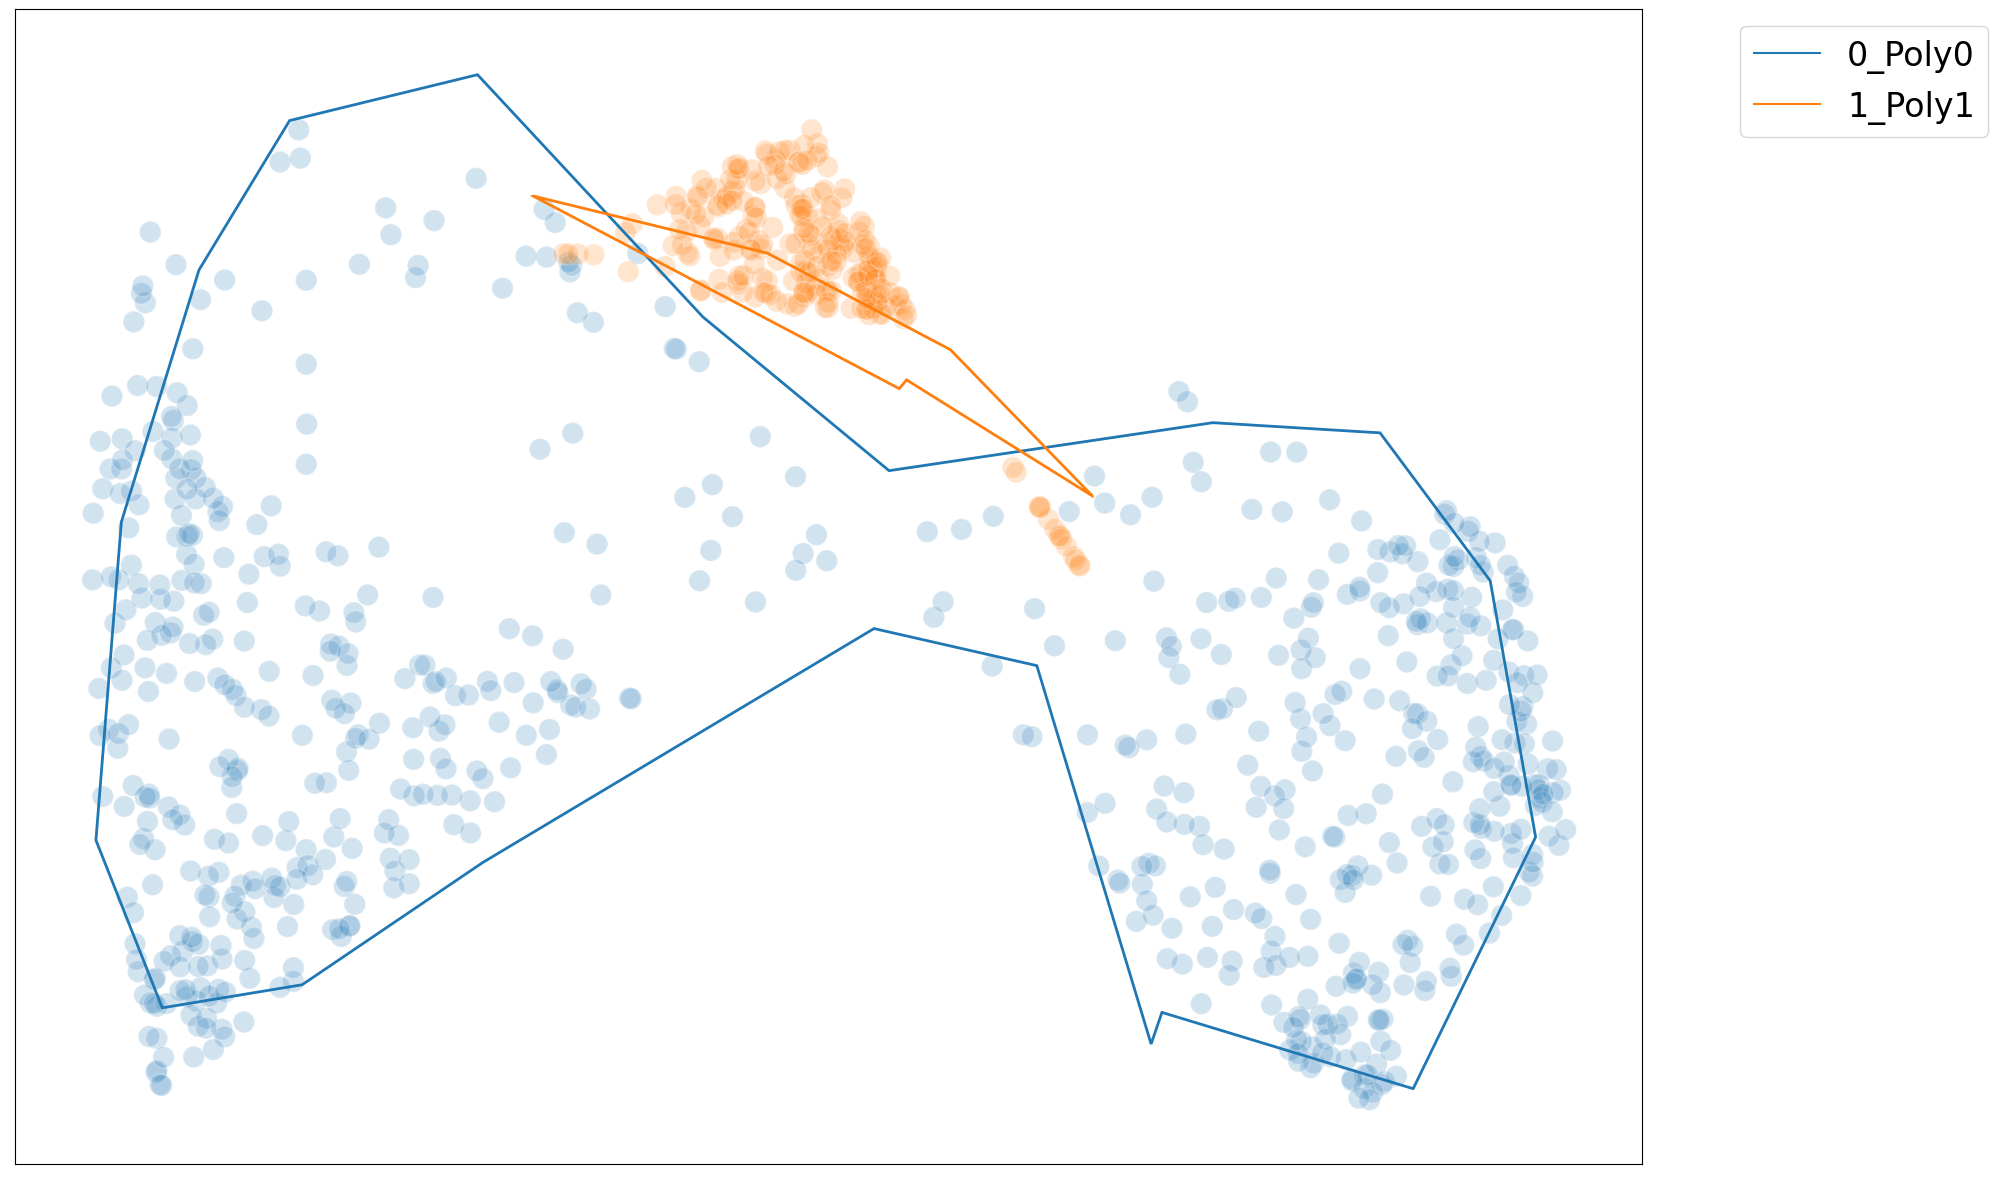

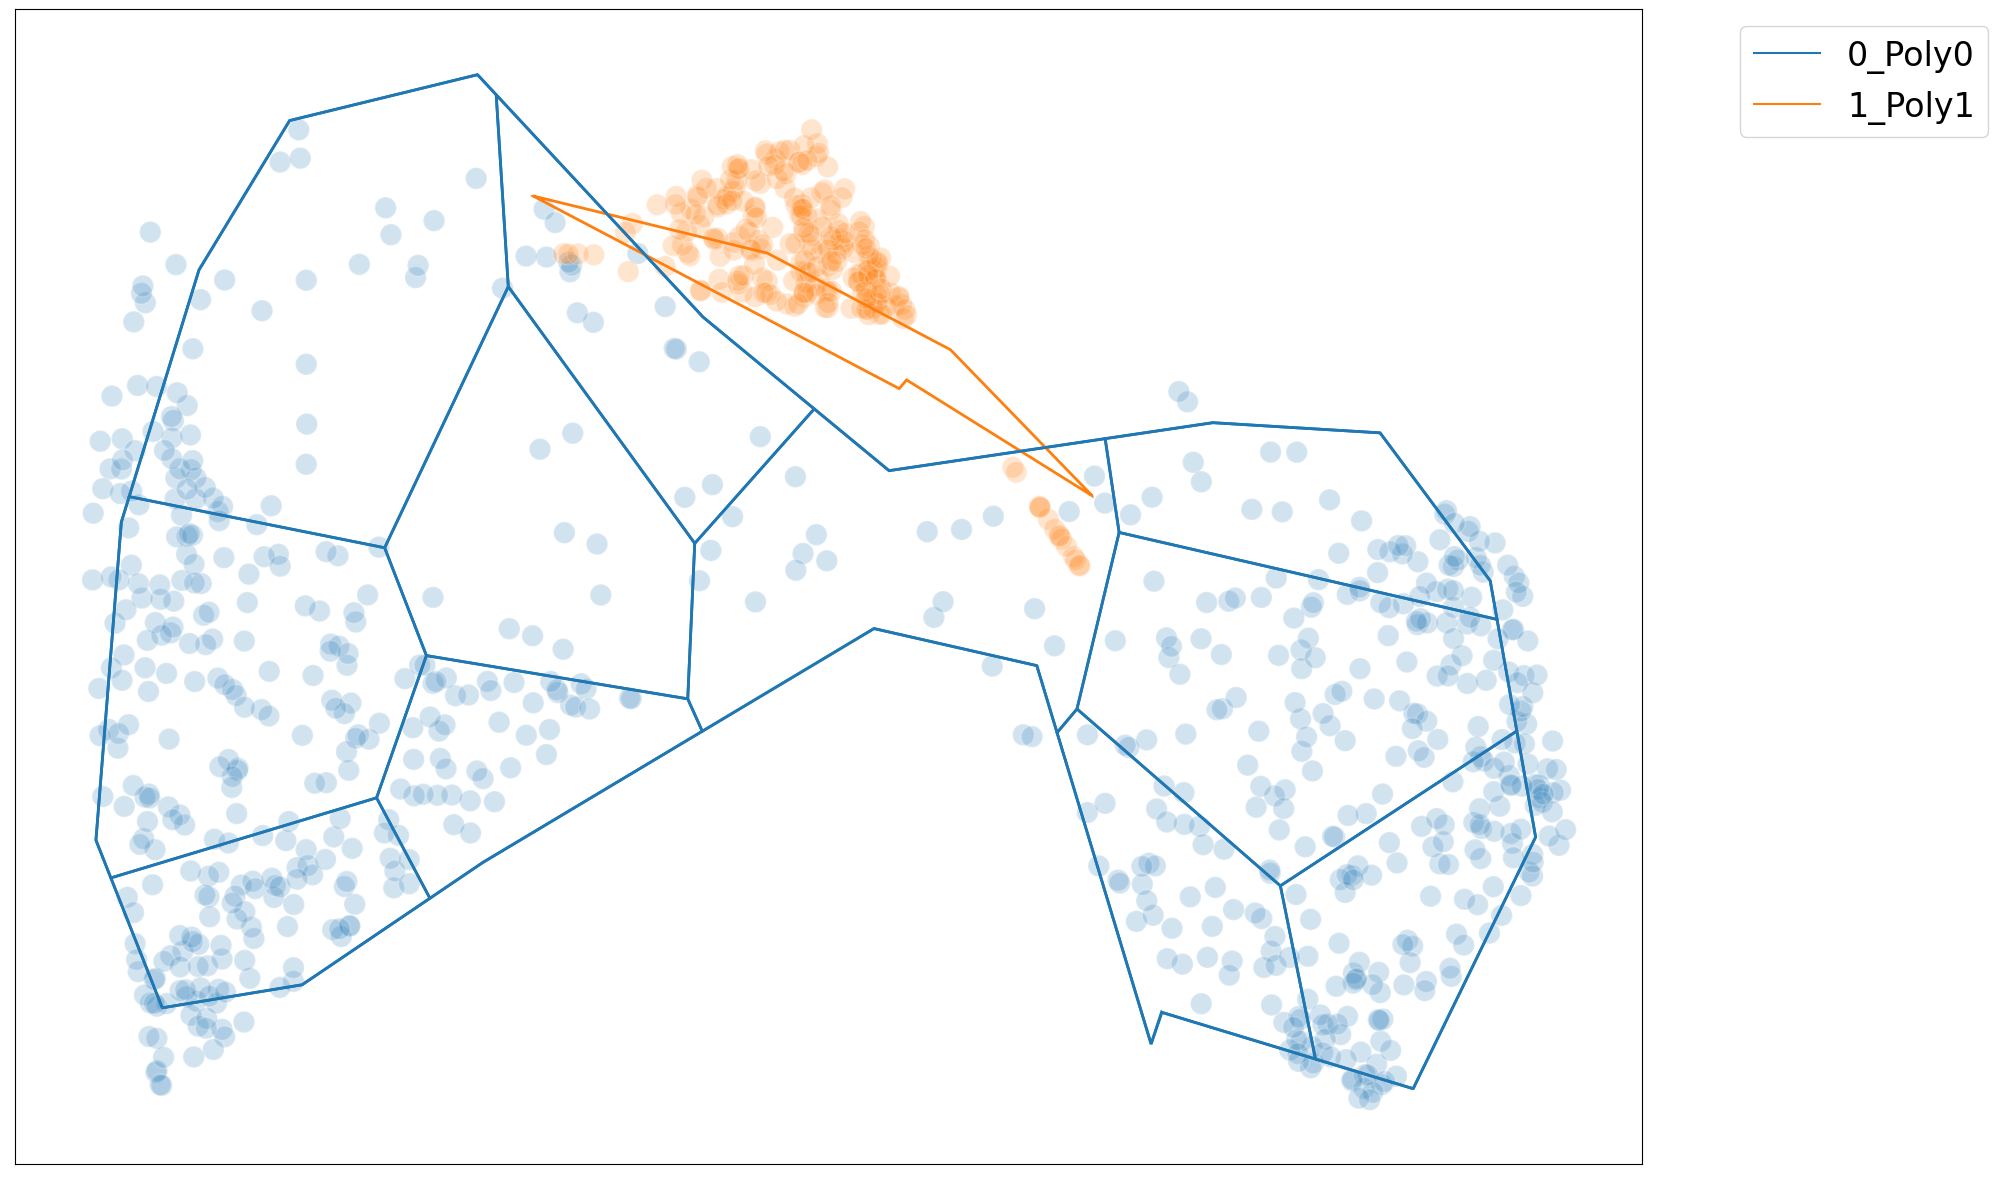

In [45]:
blobs_cp._cluster_plot_set_sns(1,figsize=blobs_cp.figsize,
                                           show_blobs=blobs_cp.show_blobs,
                                           show_points=blobs_cp.show_points,
                                           show_anchors=blobs_cp.show_anchors,
                                           show_anchors_annotation=blobs_cp.show_anchors_annotation,
                                           show_inner_blobs=blobs_cp.show_inner_blobs,
                                           douglas_peucker_tolerance=blobs_cp.douglas_peucker_tolerance,
                                           smooth_iter=blobs_cp.smooth_iter,
                                           show_label_level_plots=False,
                                           show_anchor_level_plot=False,
                                           show_loss_plot=False,
                                           default_max_val=blobs_cp.default_max_val,
                                           mat_figsize=blobs_cp.mat_figsize,
                                           mat_annot_kws_size=blobs_cp.mat_annot_kws_size,
                                           mat_label_size=blobs_cp.mat_label_size)

**8、 return self.low_dim_anchors**

In [46]:
blobs_cp.anchors_indices

[940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965]

blobs_cp.dbg_df #原始高维数据

In [47]:
low_dim_blobs_cp.shape #低维空间anchor点及其坐标 （26，2） 点的数量和维度

(26, 2)

In [48]:
# blobs_cp.intra_class_anchors.shape #高维空间中的anchor点
len(blobs_cp.intra_class_anchors_labels) #高维空间中的anchor标签 0表示第一个类的 1表示第二个类的

26

In [49]:
blobs_cp.num_clusters_each_label #表示两个label分别有22类和4类

array([22,  4], dtype=int64)

In [50]:
blobs_cp.intra_class_anchors_labels
blobs_cp.intra_class_anchors.shape #生成的26个三维anchor点
blobs_cp.clusters[0:10] #子类聚类结果标签 966个数据点包含26个anchor的标签信息
blobs_cp.anchors_density #高维空间中点的子类的个数
blobs_cp.anchors_radius #高维空间中每个子类的anchor半径1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1], dtype=int64)

(26, 3)

array([0, 1, 2, 2, 3, 1, 1, 0, 1, 0])

array([ 58,  43,  38,  65,  45,  48,   9,  55,  55,  69,  45,  40,  36,
        11,  13,  13,  14,  10,  13,   9,   7,   4, 127,  88,  10,  15],
      dtype=int64)

array([0.58994078, 0.50451823, 0.59127464, 0.62366938, 0.72034354,
       0.51494625, 0.43624202, 0.71107186, 0.65741431, 0.62912296,
       0.54474307, 0.45846435, 0.7465887 , 0.44967604, 0.46748335,
       0.69546538, 0.51362711, 0.54605717, 0.86093368, 0.54936982,
       0.42170045, 0.48603144, 0.60317404, 0.58150009, 0.58663953,
       0.54167623])

In [51]:
# 
blobs_cp.y_with_centroids.shape

(966,)

In [52]:
blobs_cp.anchors_indices

[940,
 941,
 942,
 943,
 944,
 945,
 946,
 947,
 948,
 949,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965]

In [53]:
blobs_cp.knng.toarray() #(966,966) 存储distance matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
for x1,x2 in zip(edges_x1.shape,edges_x2.shape):
    x1

19316

In [55]:
blobs_cp.knng.toarray().shape

(966, 966)

In [56]:
blobs_cp.low_dim_anchors.shape
blobs_cp.intra_class_anchors.shape
blobs_cp.high_dim_proximity_matrix
blobs_cp.low_dim_proximity_matrix

(26, 2)

(26, 3)

array([[nan,  1.],
       [ 1., nan]])

array([[nan,  1.],
       [ 1., nan]])

In [57]:
blobs_cp.inter_class_relations.shape
blobs_cp.inter_class_relations_label_level

(26, 26)

array([[         nan, 702.04862169],
       [378.07749077,          nan]])

In [58]:
blobs_cp.knng.toarray().nonzero()

(array([  0,   0,   0, ..., 965, 965, 965], dtype=int64),
 array([  9,  15,  49, ..., 933, 935, 937], dtype=int64))

# _cal_inter_class_relations
**inter_class_relations_label_level** 存储的是label维度的关系(2,2)矩阵

In [59]:
blobs_cp.inter_class_relations.shape #存储的是高维空间anchor点的矩阵

(26, 26)

In [60]:
blobs_cp.inter_class_relations_label_level.shape

(2, 2)